# Newzy Project
## Thomas Butler, vra2cf
## DS 5001

### Create DOC, LIB, TOKEN, and VOCAB Table

In [1]:
import pandas as pd
import nltk

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [3]:
newzy = pd.read_csv("newzy.csv", sep="|", header=0).set_index('doc_id')

In [4]:
print(len(newzy))
newzy.head()

1026347


doc_source                                          doc_title  \
doc_id                                                                   
39      Google News  50 Years on, Finding Profit in 'Truth' on JFK ...   
38      Google News  Nearly 10 years later, families and officials ...   
37      Google News  Cuccinelli, running hard, has been hobbled in ...   
36      Google News  Chuck Schumer endorses Hillary Clinton for Pre...   
35      Google News  Sec. Kerry issues apparent warning to Iran - C...   

                                              doc_content    doc_date  \
doc_id                                                                  
39      Washington Post50 Years on, Finding Profit in ...  11/03/2013   
38      Washington PostNearly 10 years later, families...  11/03/2013   
37      Washington PostCuccinelli, running hard, has b...  11/03/2013   
36      New York Daily NewsChuck Schumer endorses Hill...  11/03/2013   
35      Ahram OnlineSec. Kerry issues apparent warning...  11/03/2013   

                                                  doc_url  
doc_id                                                     
39      http://news.google.com/news/url?sa=t&fd=R&usg=...  
38      http://news.google.com/news/url?sa=t&fd=R&usg=...  
37      http://news.google.com/news/url?sa=t&fd=R&usg=...  
36      http://news.google.com/news/url?sa=t&fd=R&usg=...  
35      http://news.google.com/news/url?sa=t&fd=R&usg=...

In [5]:
newzy = newzy.dropna()
newzy

doc_source                                          doc_title  \
doc_id                                                                    
39       Google News  50 Years on, Finding Profit in 'Truth' on JFK ...   
38       Google News  Nearly 10 years later, families and officials ...   
37       Google News  Cuccinelli, running hard, has been hobbled in ...   
36       Google News  Chuck Schumer endorses Hillary Clinton for Pre...   
35       Google News  Sec. Kerry issues apparent warning to Iran - C...   
...              ...                                                ...   
1026378          Fox  Laura Ingraham spars with former Clinton aide ...   
1026379          Fox  Louisiana’s Abraham joins list of House Republ...   
1026380          Fox  Hillary Clinton took more cash from Harvey Wei...   
1026381          Fox  Respiratory mask supply at New York City hospi...   
1026382          CNN  Trump puts Pence in charge of coronavirus efforts   

                                               doc_content    doc_date  \
doc_id                                                                   
39       Washington Post50 Years on, Finding Profit in ...  11/03/2013   
38       Washington PostNearly 10 years later, families...  11/03/2013   
37       Washington PostCuccinelli, running hard, has b...  11/03/2013   
36       New York Daily NewsChuck Schumer endorses Hill...  11/03/2013   
35       Ahram OnlineSec. Kerry issues apparent warning...  11/03/2013   
...                                                    ...         ...   
1026378  Former Clinton aide Richard Goodstein raised t...  02/27/2020   
1026379  Rep. Ralph Abraham, R-La., said Wednesday that...  02/27/2020   
1026380  Hillary Clinton raked-in more cash from convic...  02/27/2020   
1026381  The stock of respiratory masks at Bellevue Hos...  02/27/2020   
1026382  President Donald Trump holds a press conferenc...  02/27/2020   

                                                   doc_url  
doc_id                                                      
39       http://news.google.com/news/url?sa=t&fd=R&usg=...  
38       http://news.google.com/news/url?sa=t&fd=R&usg=...  
37       http://news.google.com/news/url?sa=t&fd=R&usg=...  
36       http://news.google.com/news/url?sa=t&fd=R&usg=...  
35       http://news.google.com/news/url?sa=t&fd=R&usg=...  
...                                                    ...  
1026378  https://www.foxnews.com/media/laura-ingraham-s...  
1026379  https://www.foxnews.com/politics/louisianas-ab...  
1026380  https://www.foxnews.com/politics/hillary-clint...  
1026381  https://www.foxnews.com/health/respiratory-mas...  
1026382  http://rss.cnn.com/~r/rss/cnn_allpolitics/~3/D...  

[986461 rows x 5 columns]

In [6]:
newzy['doc_date'] = pd.to_datetime(newzy.doc_date)

In [7]:
newzy.groupby('doc_source').doc_date.min().astype(str) + ' to ' + newzy.groupby('doc_source').doc_date.max().astype(str)

doc_source
Breitbart              2013-11-03 to 2020-02-27
CNN                    2013-11-03 to 2020-02-27
Daily Kos              2013-11-03 to 2019-10-31
Drudge Report          2013-11-03 to 2020-02-26
Fox                    2013-11-03 to 2020-02-27
Google News            2013-11-03 to 2020-02-27
Guardian               2013-11-03 to 2020-02-26
NPR                    2013-11-03 to 2020-02-27
New York Times         2013-11-03 to 2020-02-27
Politico Magazine      2013-11-19 to 2020-02-27
PowerLine              2013-11-03 to 2020-02-27
Real Clear Politics    2013-11-03 to 2020-02-27
Reuters                2013-11-03 to 2020-02-27
UPI Latest             2013-11-05 to 2020-02-27
US News                2013-11-05 to 2020-02-27
Name: doc_date, dtype: object

In [8]:
newzy.doc_date.describe(datetime_is_numeric=True)

count                           986461
mean     2018-07-14 15:12:26.745791232
min                2013-11-03 00:00:00
25%                2017-10-03 00:00:00
50%                2018-07-16 00:00:00
75%                2019-05-05 00:00:00
max                2020-02-27 00:00:00
Name: doc_date, dtype: object

In [9]:
newzy.doc_date.median()

Timestamp('2018-07-16 00:00:00')

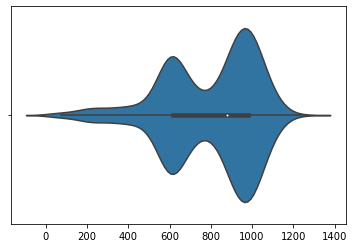

In [10]:
#general distribution of # of articles per day.
import seaborn as sns
ax = sns.violinplot(x=newzy.groupby('doc_date').count().max(axis=1))

In [11]:
#Median # of articles per day.
newzy.groupby('doc_date').count().median().max()

879.0

In [12]:
#time period document was taken for.
newzy.doc_date.max() - newzy.doc_date.min()

#6 years 3 months and 24 days

Timedelta('2307 days 00:00:00')

In [13]:
newzy.groupby('doc_source').count()

doc_title  doc_content  doc_date  doc_url
doc_source                                                    
Breitbart                10011        10011     10011    10011
CNN                      36184        36184     36184    36184
Daily Kos                12307        12307     12307    12307
Drudge Report            77063        77063     77063    77063
Fox                      58077        58077     58077    58077
Google News              64078        64078     64078    64078
Guardian                 12392        12392     12392    12392
NPR                      24708        24708     24708    24708
New York Times           21145        21145     21145    21145
Politico Magazine         3324         3324      3324     3324
PowerLine                 9730         9730      9730     9730
Real Clear Politics      34967        34967     34967    34967
Reuters                  18506        18506     18506    18506
UPI Latest               97804        97804     97804    97804
US News                 506165       506165    506165   506165

In [14]:
#how many articles do each news source have?
newzy.groupby('doc_source').count().max(axis=1)

doc_source
Breitbart               10011
CNN                     36184
Daily Kos               12307
Drudge Report           77063
Fox                     58077
Google News             64078
Guardian                12392
NPR                     24708
New York Times          21145
Politico Magazine        3324
PowerLine                9730
Real Clear Politics     34967
Reuters                 18506
UPI Latest              97804
US News                506165
dtype: int64

In [15]:
#all doc_content hold no more than 1 paragraph.
OHCO = ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']

In [16]:
def CREATE_LIB_DOC(df, OHCO=OHCO):    
    df.doc_content = df.doc_content.str.strip()
    
    # FIX CHARACTERS TO IMPROVE TOKENIZATION, Professor states this helps nltk parse text.
    df.doc_content = df.doc_content.str.replace('—', ' — ')
    df.doc_content = df.doc_content.str.replace('-', ' - ')
    
    #all doc_content hold no more than 1 paragraph.
    df['doc_content'] = df['doc_content'].str.replace(r'\n', ' ').str.strip()
    df = df[~df['doc_content'].isna()]
    df = df[~df['doc_content'].str.match(r'^\s*$', na=False)] # Remove empty paragraphs
    
    library = df[['doc_source', 'doc_title', 'doc_date', 'doc_url']]
    
    df = df.reset_index().set_index(OHCO[:3])
    df = df.drop(columns=['doc_date', 'doc_url'])
    docs = df
    return library, docs

In [17]:
LIB, DOC = CREATE_LIB_DOC(newzy)

<ipython-input-16-c8712e94d28f>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['doc_content'] = df['doc_content'].str.replace(r'\n', ' ').str.strip()


In [18]:
LIB

doc_source                                          doc_title  \
doc_id                                                                    
39       Google News  50 Years on, Finding Profit in 'Truth' on JFK ...   
38       Google News  Nearly 10 years later, families and officials ...   
37       Google News  Cuccinelli, running hard, has been hobbled in ...   
36       Google News  Chuck Schumer endorses Hillary Clinton for Pre...   
35       Google News  Sec. Kerry issues apparent warning to Iran - C...   
...              ...                                                ...   
1026378          Fox  Laura Ingraham spars with former Clinton aide ...   
1026379          Fox  Louisiana’s Abraham joins list of House Republ...   
1026380          Fox  Hillary Clinton took more cash from Harvey Wei...   
1026381          Fox  Respiratory mask supply at New York City hospi...   
1026382          CNN  Trump puts Pence in charge of coronavirus efforts   

          doc_date                                            doc_url  
doc_id                                                                 
39      2013-11-03  http://news.google.com/news/url?sa=t&fd=R&usg=...  
38      2013-11-03  http://news.google.com/news/url?sa=t&fd=R&usg=...  
37      2013-11-03  http://news.google.com/news/url?sa=t&fd=R&usg=...  
36      2013-11-03  http://news.google.com/news/url?sa=t&fd=R&usg=...  
35      2013-11-03  http://news.google.com/news/url?sa=t&fd=R&usg=...  
...            ...                                                ...  
1026378 2020-02-27  https://www.foxnews.com/media/laura-ingraham-s...  
1026379 2020-02-27  https://www.foxnews.com/politics/louisianas-ab...  
1026380 2020-02-27  https://www.foxnews.com/politics/hillary-clint...  
1026381 2020-02-27  https://www.foxnews.com/health/respiratory-mas...  
1026382 2020-02-27  http://rss.cnn.com/~r/rss/cnn_allpolitics/~3/D...  

[986446 rows x 4 columns]

In [19]:
DOC.sample(10)

doc_content
doc_source doc_id doc_title                                                                                            
US News    128670 Trump Awards Purple Heart at Walter Reed Milita...  President Donald Trump on Saturday awarded a P...
           561869 The Latest: Stefanowski Wins Backing of Indepen...  The Independent Party of Connecticut has cross...
           102720 Deputy Democratic Party Chair Keynotes New Hamp...  The newly - appointed deputy chairman of the D...
Fox        712601 Man who tipped bar staff $22G arrested for into...  A Tennessee man was arrested on public intoxic...
US News    101440 UVa Faculty: New President Should Have Academic...  Faculty members at Virginia Tech are calling o...
Reuters    189346 States refuse Trump panel request for voter inf...  CHICAGO (Reuters)  -  A growing number of U.S....
US News    121599 Police Investigating Possible Threat as Fictiti...  Police say a possible threat that led to a loc...
UPI Latest 826431 Angels' Mike Trout homers twice in victory over...  Los Angeles Angels outfielder Mike Trout regis...
           240615 Judge tosses lawsuit claiming Subway subs aren'...  A federal judge blasted a settlement in a clas...
Guardian   41844  Cooler than all of us: how the Obamas upheld Af...  Black culture and art flourished with the Obam...

In [20]:
#tokenize function
def tokenize(doc_df, OHCO=OHCO, remove_pos_tuple=False, ws=False):
    
    # Paragraphs to Sentences
    df = doc_df.doc_content\
        .apply(lambda x: pd.Series(nltk.sent_tokenize(x)))\
        .stack()\
        .to_frame()\
        .rename(columns={0:'sent_str'})
    
    # Sentences to Tokens
    # Local function to pick tokenizer
    def word_tokenize(x):
        if ws:
            s = pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x)))
        else:
            s = pd.Series(nltk.pos_tag(nltk.word_tokenize(x)))
        return s
            
    df = df.sent_str\
        .apply(word_tokenize)\
        .stack()\
        .to_frame()\
        .rename(columns={0:'pos_tuple'})
    
    # Grab info from tuple
    df['pos'] = df.pos_tuple.apply(lambda x: x[1])
    df['token_str'] = df.pos_tuple.apply(lambda x: x[0])
    if remove_pos_tuple:
        df = df.drop('pos_tuple', 1)
    
    # Add index
    df.index.names = OHCO
    
    return df

In [22]:
TOKEN = tokenize(DOC, ws = True)
TOKEN.head()

pos_tuple  \
doc_source  doc_id doc_title                                          sent_num token_num                      
Google News 39     50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          (Washington, NNP)   
                                                                               1              (Post50, NNP)   
                                                                               2               (Years, NNP)   
                                                                               3                 (on,, VBZ)   
                                                                               4             (Finding, NNP)   

                                                                                          pos  \
doc_source  doc_id doc_title                                          sent_num token_num        
Google News 39     50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          NNP   
                                                                               1          NNP   
                                                                               2          NNP   
                                                                               3          VBZ   
                                                                               4          NNP   

                                                                                           token_str  
doc_source  doc_id doc_title                                          sent_num token_num              
Google News 39     50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          Washington  
                                                                               1              Post50  
                                                                               2               Years  
                                                                               3                 on,  
                                                                               4             Finding

In [23]:
#lowercase token and replace any non-alphanumeric character with ""
TOKEN['term_str'] = TOKEN['token_str'].str.lower().str.replace('[\W_]', '')
TOKEN

<ipython-input-23-d489abad16ce>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  TOKEN['term_str'] = TOKEN['token_str'].str.lower().str.replace('[\W_]', '')


pos_tuple  \
doc_source  doc_id  doc_title                                          sent_num token_num                       
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           (Washington, NNP)   
                                                                                1               (Post50, NNP)   
                                                                                2                (Years, NNP)   
                                                                                3                  (on,, VBZ)   
                                                                                4              (Finding, NNP)   
...                                                                                                       ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                  (for, IN)   
                                                                                17             (Disease, NNP)   
                                                                                18             (Control, NNP)   
                                                                                19                  (and, CC)   
                                                                                20         (Prevention., NNP)   

                                                                                           pos  \
doc_source  doc_id  doc_title                                          sent_num token_num        
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          NNP   
                                                                                1          NNP   
                                                                                2          NNP   
                                                                                3          VBZ   
                                                                                4          NNP   
...                                                                                        ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16          IN   
                                                                                17         NNP   
                                                                                18         NNP   
                                                                                19          CC   
                                                                                20         NNP   

                                                                                             token_str  \
doc_source  doc_id  doc_title                                          sent_num token_num                
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           Washington   
                                                                                1               Post50   
                                                                                2                Years   
                                                                                3                  on,   
                                                                                4              Finding   
...                                                                                                ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                 for   
                                                                                17             Disease   
                                                                                18             Control   
                                                                                19                 and   
                                                                                20 

In [24]:
TOKEN = TOKEN.dropna()
TOKEN

pos_tuple  \
doc_source  doc_id  doc_title                                          sent_num token_num                       
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           (Washington, NNP)   
                                                                                1               (Post50, NNP)   
                                                                                2                (Years, NNP)   
                                                                                3                  (on,, VBZ)   
                                                                                4              (Finding, NNP)   
...                                                                                                       ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                  (for, IN)   
                                                                                17             (Disease, NNP)   
                                                                                18             (Control, NNP)   
                                                                                19                  (and, CC)   
                                                                                20         (Prevention., NNP)   

                                                                                           pos  \
doc_source  doc_id  doc_title                                          sent_num token_num        
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          NNP   
                                                                                1          NNP   
                                                                                2          NNP   
                                                                                3          VBZ   
                                                                                4          NNP   
...                                                                                        ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16          IN   
                                                                                17         NNP   
                                                                                18         NNP   
                                                                                19          CC   
                                                                                20         NNP   

                                                                                             token_str  \
doc_source  doc_id  doc_title                                          sent_num token_num                
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           Washington   
                                                                                1               Post50   
                                                                                2                Years   
                                                                                3                  on,   
                                                                                4              Finding   
...                                                                                                ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                 for   
                                                                                17             Disease   
                                                                                18             Control   
                                                                                19                 and   
                                                                                20 

In [25]:
#count the number of distinct terms and the number of times they occur and put them into a new dataframe.
VOCAB = TOKEN.term_str.value_counts().to_frame().rename(columns={'index':'term_str', 'term_str':'n'})\
    .sort_index().reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'

#Check if term is a int
VOCAB['num'] = VOCAB.term_str.str.match("\d+").astype('int')

In [26]:
VOCAB

term_str       n  num
term_id                       
0                  777580    0
1               0    7582    1
2              00      20    1
3             000      20    1
4            0000    1131    1
...           ...     ...  ...
389635         아기       1    0
389636        ﬁlm       3    0
389637   ﬁnancial       1    0
389638       ﬁrst       1    0
389639     ﬂaying       1    0

[389640 rows x 3 columns]

In [27]:
#Create a dataframe of stop words
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [28]:
#map stop words with terms to determine which words are stop words.
VOCAB['stop'] = VOCAB.term_str.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [29]:
VOCAB[VOCAB.stop == 1].sample(10)

term_str       n  num  stop
term_id                            
102532      down   25340    0     1
150958   herself    1959    0     1
41793     before   28293    0     1
243922       our   22337    0     1
171842       isn       4    0     1
127957       for  357016    0     1
123248       few    8980    0     1
376515      were   56568    0     1
380982       won    7703    0     1
100860        do   22544    0     1

In [30]:
from nltk.stem.porter import PorterStemmer

#determine stems of all words
stemmer = PorterStemmer()
VOCAB['p_stem'] = VOCAB.term_str.apply(stemmer.stem)

In [31]:
VOCAB.sample(10)

term_str   n  num  stop                p_stem
term_id                                                           
42530             belligerent  76    0     0              belliger
36222              azprotests   1    0     0             azprotest
96648               detonates  19    0     0                 deton
71554                cnbcfiat   2    0     0              cnbcfiat
191425             leinbachap   1    0     0            leinbachap
171360         irrationalites   1    0     0          irrationalit
253631          photoelectric   1    0     0           photoelectr
20262              againafter   5    0     0              againaft
240325                  oilus   1    0     0                  oilu
270713   protestingrepublican   1    0     0  protestingrepublican

In [32]:
TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)
TOKEN

pos_tuple  \
doc_source  doc_id  doc_title                                          sent_num token_num                       
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           (Washington, NNP)   
                                                                                1               (Post50, NNP)   
                                                                                2                (Years, NNP)   
                                                                                3                  (on,, VBZ)   
                                                                                4              (Finding, NNP)   
...                                                                                                       ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                  (for, IN)   
                                                                                17             (Disease, NNP)   
                                                                                18             (Control, NNP)   
                                                                                19                  (and, CC)   
                                                                                20         (Prevention., NNP)   

                                                                                           pos  \
doc_source  doc_id  doc_title                                          sent_num token_num        
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          NNP   
                                                                                1          NNP   
                                                                                2          NNP   
                                                                                3          VBZ   
                                                                                4          NNP   
...                                                                                        ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16          IN   
                                                                                17         NNP   
                                                                                18         NNP   
                                                                                19          CC   
                                                                                20         NNP   

                                                                                             token_str  \
doc_source  doc_id  doc_title                                          sent_num token_num                
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           Washington   
                                                                                1               Post50   
                                                                                2                Years   
                                                                                3                  on,   
                                                                                4              Finding   
...                                                                                                ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                 for   
                                                                                17             Disease   
                                                                                18             Control   
                                                                                19                 and   
                                                                                20 

In [33]:
#contains the most frequently associated part-of-speech tag, as found in the TOKEN table, with each term.
VOCAB['pos_max'] = TOKEN.groupby(['term_id', 'pos']).count().iloc[:,0].unstack().idxmax(1)

In [34]:
VOCAB.sample(10)

term_str     n  num  stop               p_stem pos_max
term_id                                                                     
136546          gillespietrans     1    0     0        gillespietran     NNP
292926           russiandoesnt     1    0     0        russiandoesnt     NNP
17378    accountsnprbookkeeper     1    0     0  accountsnprbookkeep     NNP
178788                justices  1161    0     0               justic     NNS
195351                  lleida     2    0     0               lleida     NNP
210291                 michela     4    0     0              michela     NNP
141479            greyjoyslate     1    0     0            greyjoysl     NNP
108102        elementalopinion     1    0     0     elementalopinion     NNP
372099              walmartcbs     1    0     0            walmartcb     NNP
313356          spacecomsunset     1    0     0       spacecomsunset     NNP

In [35]:
#save as csv
#when these are saved as csv, certain term strings don't get saved properly and turn N/A. Will try to avoid reloading data but this does happens if you do reload. Not sure how to fix.
DOC.to_csv('DOC.csv')
LIB.to_csv('LIB.csv')
VOCAB.to_csv('VOCAB.csv')
TOKEN.to_csv('TOKEN.csv')

### Add TFIDF

In [36]:
import pandas as pd
import numpy as np
#all doc_content hold no more than 1 paragraph.
OHCO = ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']

TOKEN = pd.read_csv('TOKEN.csv').set_index(OHCO)
TOKEN = TOKEN[~TOKEN.term_str.isna()]
#VOCAB = pd.read_csv('VOCAB.csv').set_index('term_id')

In [37]:
def TFIDF_matrix(TOKEN, bag, count_method, tf_method, idf_method, term_id = True, VOCAB = False, tf_norm_k = .5):
    #TOKEN is the token dataframe.
    #bag ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']
    #term_id assumes the token dataframe has term id in it. If it doesn't set to False.
    #VOCAB is the vocab dataframe. Only used if term_id = False.
    #count_method 'c' or 'n'; n = n tokens, c = distinct token (term) count
    #tf_method [sum, max, log, double_norm, raw, binary], must be string
    #tf_norm_k only used if tf_method="double_norm"
    #idf_method [standard, max, smooth], must be string
    
    import numpy as np
    
    #decide bag level.
    OHCO = ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']
    bag = bag.lower()
    if bag == "token_num":
        bag = OHCO[:5]
    elif bag == "sent_num":
        bag = OHCO[:4]
    elif bag == "doc_id":
        bag = OHCO[:2]
    elif bag == "doc_source":
        bag = OHCO[:1]
        
    #remove na's from dataframe.
    TOKEN = TOKEN[~TOKEN.term_str.isna()]
        
    #term_id
    #remove na's from VOCAB here because term_id = False means it is being used and must be pasted into the function.
    if term_id == False:
        VOCAB = VOCAB[~VOCAB.term_str.isna()]
        TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)
        TOKEN = TOKEN[~TOKEN.term_str.isna()]
    
    #count_method
    BOW = TOKEN.groupby(bag +['term_id']).term_id.count().to_frame().rename(columns={'term_id':'n'})
    BOW['c'] = BOW.n.astype('bool').astype('int')
    DTCM = BOW.reset_index().pivot(index=bag, columns='term_id', values=count_method).fillna(0).astype('int')
    
    #TF method
    tf_method = tf_method.lower()
    if tf_method == 'sum':
        TF = DTCM.T / DTCM.T.sum()
    elif tf_method == 'max':
        TF = DTCM.T / DTCM.T.max()
    elif tf_method == 'log':
        TF = np.log10(1 + DTCM.T)
    elif tf_method == 'raw':
        TF = DTCM.T
    elif tf_method == 'double_norm':
        TF = DTCM.T / DTCM.T.max()
        TF = tf_norm_k + (1 - tf_norm_k) * TF[TF > 0]
    elif tf_method == 'binary':
        TF = DTCM.T.astype('bool').astype('int')
    TF = TF.T

    #IDF method
    idf_method = idf_method.lower()
    DF = DTCM[DTCM > 0].count()
    N = DTCM.shape[0]
    if idf_method == 'standard':
        IDF = np.log10(N / DF)
    elif idf_method == 'max':
        IDF = np.log10(DF.max() / DF) 
    elif idf_method == 'smooth':
        IDF = np.log10((1 + N) / (1 + DF)) + 1

    #comput TFIDF
    TFIDF = TF * IDF
    return TFIDF

In [38]:
TFIDF_doc_source = TFIDF_matrix(TOKEN=TOKEN, term_id=True, bag="doc_source", count_method="n", tf_method="sum", idf_method="standard")

In [39]:
TFIDF_doc_source.sample(10)

term_id                    1             2             3             4       \
doc_source                                                                    
Reuters              4.206724e-07  0.000000e+00  0.000000e+00  5.758000e-07   
UPI Latest           2.020719e-05  0.000000e+00  0.000000e+00  1.746873e-07   
Fox                  3.780555e-06  0.000000e+00  2.503876e-07  2.503876e-07   
US News              5.417820e-05  4.944016e-08  6.854754e-08  1.028213e-07   
Guardian             7.024241e-07  0.000000e+00  0.000000e+00  0.000000e+00   
Real Clear Politics  6.946089e-07  0.000000e+00  0.000000e+00  0.000000e+00   
Daily Kos            1.039059e-06  0.000000e+00  1.015874e-07  1.130668e-04   
Drudge Report        2.251194e-06  3.667013e-06  0.000000e+00  0.000000e+00   
Breitbart            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Politico Magazine    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

term_id              5       6       7             8       9       10      \
doc_source                                                                  
Reuters                 0.0     0.0     0.0  0.000000e+00     0.0     0.0   
UPI Latest              0.0     0.0     0.0  0.000000e+00     0.0     0.0   
Fox                     0.0     0.0     0.0  0.000000e+00     0.0     0.0   
US News                 0.0     0.0     0.0  0.000000e+00     0.0     0.0   
Guardian                0.0     0.0     0.0  0.000000e+00     0.0     0.0   
Real Clear Politics     0.0     0.0     0.0  0.000000e+00     0.0     0.0   
Daily Kos               0.0     0.0     0.0  2.233884e-07     0.0     0.0   
Drudge Report           0.0     0.0     0.0  0.000000e+00     0.0     0.0   
Breitbart               0.0     0.0     0.0  0.000000e+00     0.0     0.0   
Politico Magazine       0.0     0.0     0.0  0.000000e+00     0.0     0.0   

term_id              ...  389630  389631  389632        389633  389634  \
doc_source           ...                                                 
Reuters              ...     0.0     0.0     0.0  0.000000e+00     0.0   
UPI Latest           ...     0.0     0.0     0.0  0.000000e+00     0.0   
Fox                  ...     0.0     0.0     0.0  0.000000e+00     0.0   
US News              ...     0.0     0.0     0.0  0.000000e+00     0.0   
Guardian             ...     0.0     0.0     0.0  0.000000e+00     0.0   
Real Clear Politics  ...     0.0     0.0     0.0  0.000000e+00     0.0   
Daily Kos            ...     0.0     0.0     0.0  3.002363e-07     0.0   
Drudge Report        ...     0.0     0.0     0.0  0.000000e+00     0.0   
Breitbart            ...     0.0     0.0     0.0  0.000000e+00     0.0   
Politico Magazine    ...     0.0     0.0     0.0  0.000000e+00     0.0   

term_id                    389635        389636        389637        389638  \
doc_source                                                                    
Reuters              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
UPI Latest           0.000000e+00  7.682668e-07  0.000000e+00  5.162792e-07   
Fox                  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
US News              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Guardian             0.000000e+00  6.342628e-07  8.524556e-07  0.000000e+00   
Real Clear Politics  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Daily Kos            3.002363e-07  0.000000e+00  0.000000e+00  0.000000e+00   
Drudge Report        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Breitbart            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Politico Magazine    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

term_id                    389639  
doc_source                         
Reuters              0.000000e+00  
UPI Latest           0.000000e+00  
Fox                  0.000000e+00  
US News              0.000000e+00  
Guardian             8.524556e-07  
Real Clear Politics  0.000000e+00  


In [40]:
TFIDF_doc_source.to_csv('TFIDF_doc_source.csv')

In [41]:
TOKEN_TFIDF_doc_source = TOKEN.reset_index().set_index(['term_id', 'doc_source']).join(TFIDF_doc_source.unstack().rename("TFIDF_doc_source")).reset_index().set_index(OHCO)

In [42]:
TOKEN_TFIDF_doc_source.sample(10)

term_id  \
doc_source  doc_id doc_title                                          sent_num token_num            
UPI Latest  333747 James Mangold tapped to direct Patty Hearst movie  0        2           201866   
US News     200745 2 Sisters Killed in Crash Into Indiana Home Mou... 0        2           131071   
Google News 471098 Prosecutors drop invasion-of-privacy charge aga... 4        1           141409   
            813789 Highest-Quality New Vehicles in America - MSN A... 1        12          265858   
Fox         470361 China sending envoy to US for talks amid trade ... 0        21          203141   
US News     305624 Applications Being Accepted for Home Heating As... 0        8           339302   
Reuters     158841 Trump talks trade with EU, varied differences r... 0        6           355340   
Fox         298124 AP ANALYSIS: Saudi promise of 'moderate Islam' ... 0        36          347350   
US News     710191 Special Needs Michigan Man Becomes Eagle Scout ... 0        13           32878   
            289732 Police: Fugitive Caught Trying to Cross Border ... 0        16           31335   

                                                                                                      pos_tuple  \
doc_source  doc_id doc_title                                          sent_num token_num                          
UPI Latest  333747 James Mangold tapped to direct Patty Hearst movie  0        2             ('Mangold', 'NNP')   
US News     200745 2 Sisters Killed in Crash Into Indiana Home Mou... 0        2             ('friends', 'NNS')   
Google News 471098 Prosecutors drop invasion-of-privacy charge aga... 4        1          ("Greitens's", 'NNP')   
            813789 Highest-Quality New Vehicles in America - MSN A... 1        12            ("Power's", 'NNP')   
Fox         470361 China sending envoy to US for talks amid trade ... 0        21            ('markets', 'NNS')   
US News     305624 Applications Being Accepted for Home Heating As... 0        8                  ('the', 'DT')   
Reuters     158841 Trump talks trade with EU, varied differences r... 0        6               ('Trump', 'NNP')   
Fox         298124 AP ANALYSIS: Saudi promise of 'moderate Islam' ... 0        36                  ('to', 'TO')   
US News     710191 Special Needs Michigan Man Becomes Eagle Scout ... 0        13                  ('at', 'IN')   
            289732 Police: Fugitive Caught Trying to Cross Border ... 0        16           ('arrested', 'VBD')   

                                                                                          pos  \
doc_source  doc_id doc_title                                          sent_num token_num        
UPI Latest  333747 James Mangold tapped to direct Patty Hearst movie  0        2          NNP   
US News     200745 2 Sisters Killed in Crash Into Indiana Home Mou... 0        2          NNS   
Google News 471098 Prosecutors drop invasion-of-privacy charge aga... 4        1          NNP   
            813789 Highest-Quality New Vehicles in America - MSN A... 1        12         NNP   
Fox         470361 China sending envoy to US for talks amid trade ... 0        21         NNS   
US News     305624 Applications Being Accepted for Home Heating As... 0        8           DT   
Reuters     158841 Trump talks trade with EU, varied differences r... 0        6          NNP   
Fox         298124 AP ANALYSIS: Saudi promise of 'moderate Islam' ... 0        36          TO   
US News     710191 Special Needs Michigan Man Becomes Eagle Scout ... 0        13          IN   
            289732 Police: Fugitive Caught Trying to Cross Border ... 0        16         VBD   

                                                                                           token_str  \
doc_source  doc_id doc_title                                          sent_num token_num               
UPI Latest  333747 James Mangold tapped to direct Patty Hearst movie  0        2             Mangold   
US News     200745 

In [43]:
TOKEN_TFIDF_doc_source.to_csv('TOKEN_TFIDF_doc_source.csv')

#Lack the ram to run this. both on the full dataset and the reduced with just CNN and Fox articles. I tested and this worked with the first 1,000,000 tokens so the code works.

TFIDF_doc_id = TFIDF_matrix(TOKEN=TOKEN, term_id=True, bag="doc_id", count_method="n", tf_method="sum", idf_method="standard")

#index 2106733025 is out of bounds for axis 0 with size 2106730096

TFIDF_doc_id.sample(10)

TFIDF_doc_id.to_csv('TFIDF_doc_id.csv')

FOXCNN = TOKEN.reset_index()[TOKEN.reset_index()['doc_source'].isin(['Fox', 'CNN'])].set_index(OHCO)

TFIDF_doc_id_FOXCNN = TFIDF_matrix(TOKEN=FOXCNN, term_id=True, bag="doc_id", count_method="n", tf_method="sum", idf_method="standard")

#IndexError: index 157878021 is out of bounds for axis 0 with size 157875104

### Hierarchical cluster diagrams only on Doc_Source

In [44]:
DOC1 = TFIDF_doc_source.reset_index()["doc_source"]
DOC1.index.name = 'doc_source_id'
TFIDF = TFIDF_doc_source

In [45]:
DOC1

doc_source_id
0               Breitbart
1                     CNN
2               Daily Kos
3           Drudge Report
4                     Fox
5             Google News
6                Guardian
7                     NPR
8          New York Times
9       Politico Magazine
10              PowerLine
11    Real Clear Politics
12                Reuters
13             UPI Latest
14                US News
Name: doc_source, dtype: object

In [46]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

#Norms
L0 = TFIDF.astype('bool').astype('int')
L1 = TFIDF.apply(lambda x: x / x.sum(), 1)
L2 = TFIDF.apply(lambda x: x / norm(x), 1)

#Set up PAIRS df
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([DOC1.index.tolist(), DOC1.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

#Calculate metrics
PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')
PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')
PAIRS['cosine'] = pdist(TFIDF, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')
PAIRS['euclidean2'] = pdist(L2, 'euclidean')
PAIRS['minkowski'] = pdist(TFIDF , 'minkowski', p=5)

#Code to make dendrogram tree
def hca(sims, linkage_method='ward', color_thresh=0.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = list(DOC1.values)
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

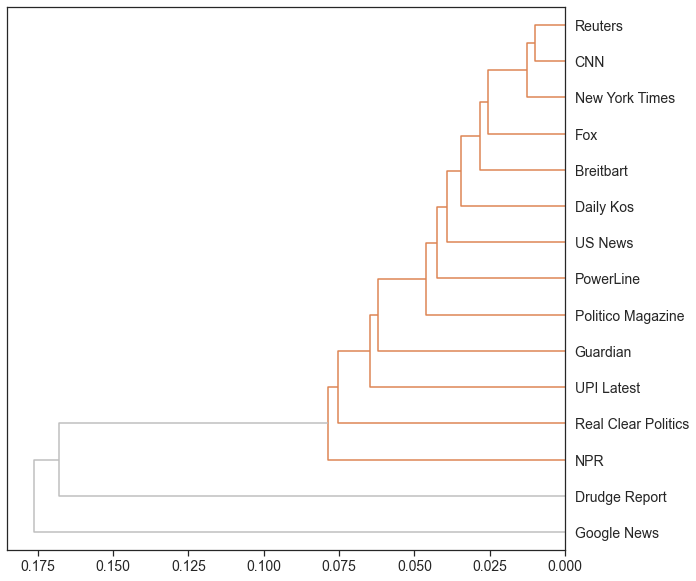

In [47]:
hca(PAIRS.cityblock, color_thresh=0.1)

<Figure size 432x288 with 0 Axes>

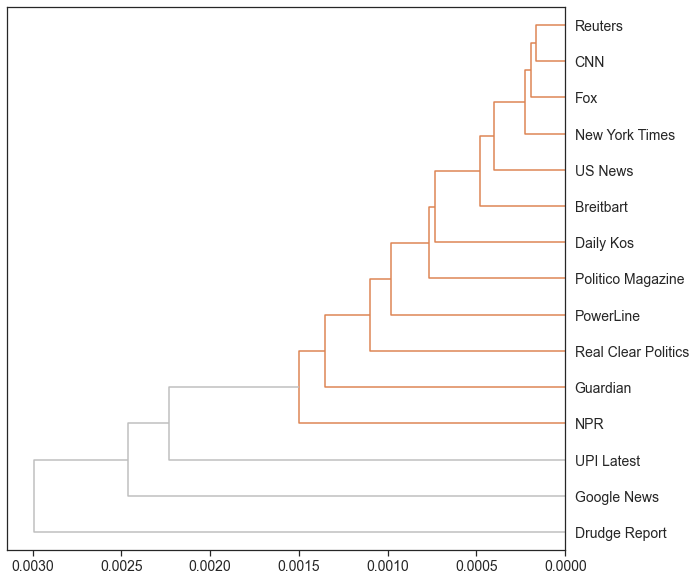

In [48]:
hca(PAIRS.euclidean, color_thresh=0.0015)

<Figure size 432x288 with 0 Axes>

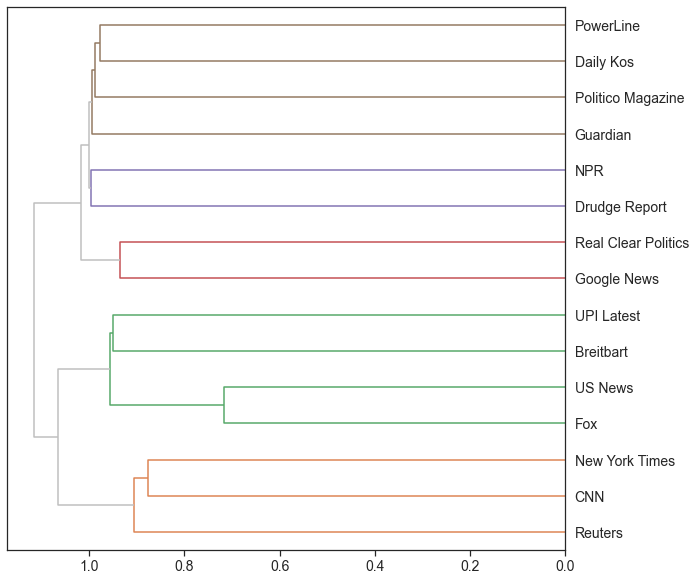

In [49]:
hca(PAIRS.cosine, color_thresh=1.0)

<Figure size 432x288 with 0 Axes>

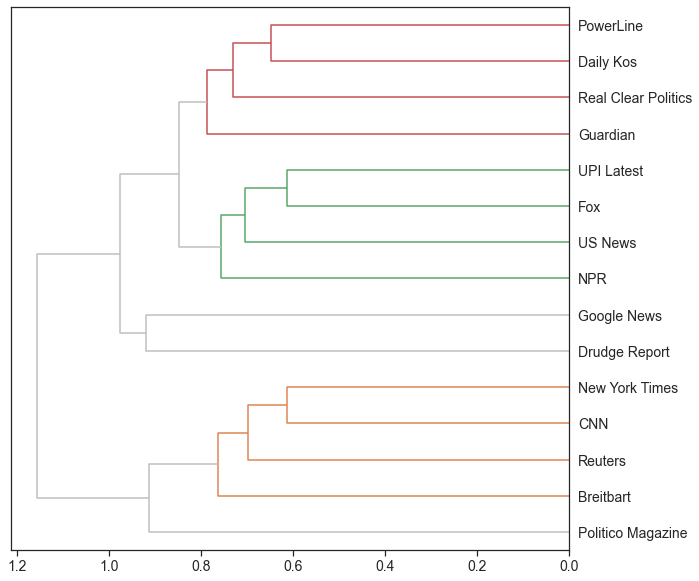

In [50]:
hca(PAIRS.jaccard, color_thresh=0.8)

<Figure size 432x288 with 0 Axes>

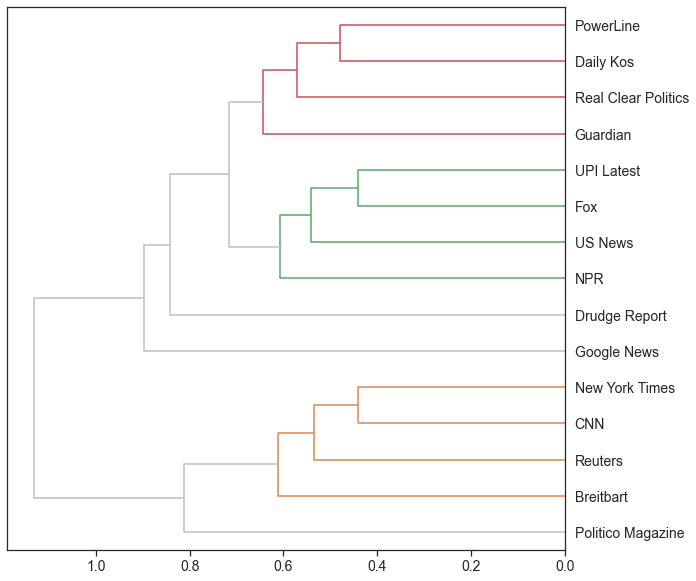

In [51]:
hca(PAIRS.dice, color_thresh=0.7)

In [52]:
hca(PAIRS.js, color_thresh=0.85)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

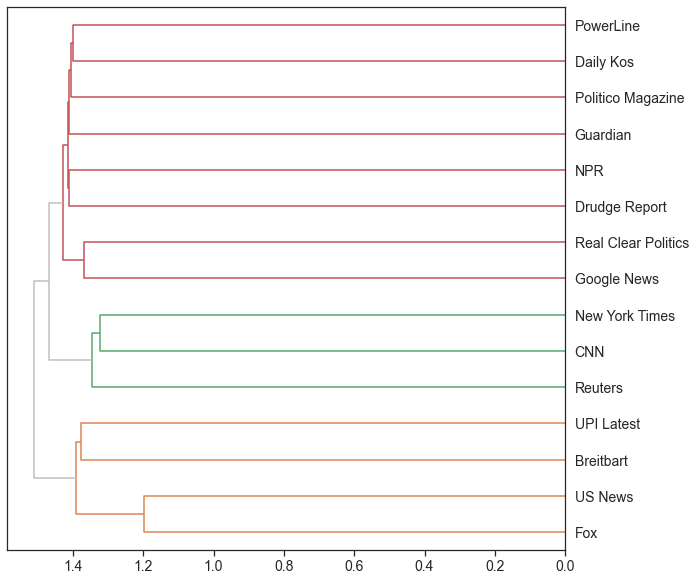

In [53]:
hca(PAIRS.euclidean2, color_thresh=1.45)

<Figure size 432x288 with 0 Axes>

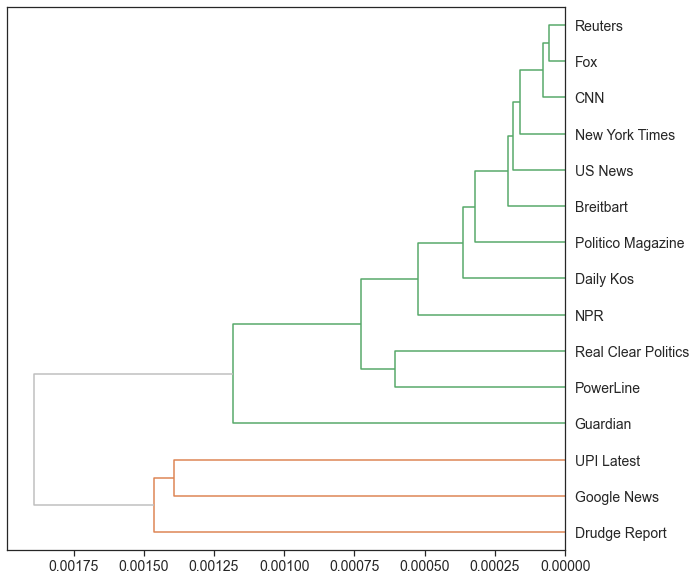

In [54]:
hca(PAIRS.minkowski, color_thresh=0.0015)

### PCA on doc_source

Note I couldn't run PCA on doc_id because my computer can't calculate TFIDF on doc_id because of memory issues.

In [55]:
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

In [56]:
#get doc_source TFIDF sum into VOCAB table
TFIDF_doc_source_sum = TFIDF_doc_source.sum()
TFIDF_doc_source_sum

term_id
1         9.524378e-05
2         4.802587e-06
3         2.221265e-06
4         1.153829e-04
5         2.577208e-07
              ...     
389635    3.002363e-07
389636    1.402530e-06
389637    8.524556e-07
389638    5.162792e-07
389639    8.524556e-07
Length: 389637, dtype: float64

In [57]:
#VOCAB = pd.read_csv('VOCAB.csv').set_index('term_id')
#VOCAB = VOCAB[~VOCAB.term_str.isna()]
VOCAB_TFIDF_doc_source_sum = VOCAB.join(TFIDF_doc_source_sum.rename('tfidf_sum'))
VOCAB_TFIDF_doc_source_sum

term_str       n  num  stop    p_stem pos_max     tfidf_sum
term_id                                                             
0                  777580    0     0                 :           NaN
1               0    7582    1     0         0      CD  9.524378e-05
2              00      20    1     0        00      CD  4.802587e-06
3             000      20    1     0       000      CD  2.221265e-06
4            0000    1131    1     0      0000     NNP  1.153829e-04
...           ...     ...  ...   ...       ...     ...           ...
389635         아기       1    0     0        아기      NN  3.002363e-07
389636        ﬁlm       3    0     0       ﬁlm     NNP  1.402530e-06
389637   ﬁnancial       1    0     0  ﬁnancial      JJ  8.524556e-07
389638       ﬁrst       1    0     0      ﬁrst     NNP  5.162792e-07
389639     ﬂaying       1    0     0       ﬂay     VBG  8.524556e-07

[389640 rows x 7 columns]

In [58]:
top_4000 = list(VOCAB_TFIDF_doc_source_sum.nlargest(4000,"tfidf_sum").index.values)

TFIDF = TFIDF_doc_source.T.filter(items=top_4000, axis=0).T
TFIDF.head()

term_id          362813    326536  231221  384050        19362   54354   \
doc_source                                                                
Breitbart      0.000017  0.000000     0.0     0.0  1.694743e-07     0.0   
CNN            0.000000  0.000000     0.0     0.0  1.063696e-07     0.0   
Daily Kos      0.000000  0.000000     0.0     0.0  1.745184e-07     0.0   
Drudge Report  0.000000  0.001235     0.0     0.0  9.379585e-04     0.0   
Fox            0.000000  0.000000     0.0     0.0  3.910405e-08     0.0   

term_id          194290    339483  212317  389341  ...    17028     18084   \
doc_source                                         ...                       
Breitbart      0.000000  0.000000     0.0     0.0  ...  0.000000  0.000000   
CNN            0.000000  0.000000     0.0     0.0  ...  0.000000  0.000000   
Daily Kos      0.000000  0.000001     0.0     0.0  ...  0.000000  0.000000   
Drudge Report  0.000609  0.000000     0.0     0.0  ...  0.000012  0.000012   
Fox            0.000000  0.000000     0.0     0.0  ...  0.000000  0.000000   

term_id          26005     54789     58584     58736     65279     79055   \
doc_source                                                                  
Breitbart      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CNN            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Daily Kos      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Drudge Report  0.000012  0.000012  0.000012  0.000012  0.000012  0.000012   
Fox            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

term_id          83931     99114   
doc_source                         
Breitbart      0.000000  0.000000  
CNN            0.000000  0.000000  
Daily Kos      0.000000  0.000000  
Drudge Report  0.000012  0.000012  
Fox            0.000000  0.000000  

[5 rows x 4000 columns]

In [59]:
#Normalize doc vector length
TFIDF = TFIDF.apply(lambda x: x / norm(x), 1)

#center word vectors 
TFIDF = TFIDF - TFIDF.mean()

#Covariance Matrix using pandas
COV = TFIDF.cov()
COV.head()

term_id    362813    326536    231221    384050    19362     54354     194290  \
term_id                                                                         
362813   0.037232 -0.002236 -0.002225  0.029688 -0.001710 -0.003529 -0.001103   
326536  -0.002236  0.022550 -0.001740 -0.001660  0.017116 -0.002593  0.011126   
231221  -0.002225 -0.001740  0.026323 -0.001794 -0.001333 -0.002788 -0.000859   
384050   0.029688 -0.001660 -0.001794  0.023788 -0.001271 -0.002672 -0.000819   
19362   -0.001710  0.017116 -0.001333 -0.001271  0.012992 -0.001980  0.008444   

term_id    339483    212317    389341  ...    17028     18084     26005   \
term_id                                ...                                 
362813  -0.001206 -0.003021 -0.002474  ... -0.000021 -0.000021 -0.000021   
326536  -0.000942 -0.002188 -0.001782  ...  0.000212  0.000212  0.000212   
231221   0.014128 -0.002364 -0.001925  ... -0.000016 -0.000016 -0.000016   
384050  -0.000971 -0.002255 -0.001836  ... -0.000016 -0.000016 -0.000016   
19362   -0.000722 -0.001662 -0.001360  ...  0.000161  0.000161  0.000161   

term_id    54789     58584     58736     65279     79055     83931     99114   
term_id                                                                        
362813  -0.000021 -0.000021 -0.000021 -0.000021 -0.000021 -0.000021 -0.000021  
326536   0.000212  0.000212  0.000212  0.000212  0.000212  0.000212  0.000212  
231221  -0.000016 -0.000016 -0.000016 -0.000016 -0.000016 -0.000016 -0.000016  
384050  -0.000016 -0.000016 -0.000016 -0.000016 -0.000016 -0.000016 -0.000016  
19362    0.000161  0.000161  0.000161  0.000161  0.000161  0.000161  0.000161  

[5 rows x 4000 columns]

In [60]:
#Eigendecomposition to COV
from scipy.linalg import eigh as eig

eig_vals, eig_vecs = eig(COV)

In [61]:
#Eigenvalues and eigenvectors into one table.
TERM_IDX = COV.index

EIG_VEC = pd.DataFrame(eig_vecs, index=TERM_IDX, columns=TERM_IDX)
EIG_VAL = pd.DataFrame(eig_vals, index=TERM_IDX, columns=['eig_val'])
EIG_VAL.index.name = 'term_id'

EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)
EIG_PAIRS.head()

eig_val    362813    326536    231221    384050     19362  \
term_id                                                                   
362813  -1.058522e-16  0.017261 -0.030627  0.071427  0.005668  0.096503   
326536  -8.007291e-17 -0.002981 -0.200457 -0.023058 -0.113328  0.260400   
231221  -6.782601e-17  0.009012 -0.042404 -0.112844 -0.058243  0.336304   
384050  -5.268943e-17  0.027195  0.246590 -0.053513 -0.152962 -0.197388   
19362   -4.607658e-17  0.044142  0.400658 -0.087296  0.070988 -0.242696   

            54354    194290    339483    212317  ...     17028     18084  \
term_id                                          ...                       
362813  -0.008559  0.423797 -0.170326 -0.048934  ... -0.000614 -0.000614   
326536  -0.062525 -0.230256 -0.204189 -0.048278  ... -0.000719 -0.000719   
231221  -0.018542 -0.216312 -0.087228  0.205613  ... -0.001327 -0.001327   
384050  -0.119246 -0.167217 -0.404409 -0.265846  ...  0.000134  0.000134   
19362    0.014854 -0.178843  0.200117  0.220859  ...  0.000051  0.000051   

            26005     54789     58584     58736     65279     79055     83931  \
term_id                                                                         
362813  -0.000614 -0.000613 -0.000613 -0.000612 -0.000641 -0.000641 -0.000937   
326536  -0.000719 -0.000717 -0.000716 -0.000714 -0.000638 -0.000639 -0.000536   
231221  -0.001327 -0.001330 -0.001330 -0.001327 -0.001294 -0.001291 -0.000943   
384050   0.000134  0.000140  0.000140  0.000138 -0.000095 -0.000097 -0.000013   
19362    0.000051  0.000051  0.000054  0.000053  0.000100  0.000110  0.000140   

            99114  
term_id            
362813  -0.001064  
326536  -0.000608  
231221  -0.001035  
384050  -0.000073  
19362    0.000018  

[5 rows x 4001 columns]

In [62]:
#Calculate explained variance as exp_var
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)

In [63]:
EIG_PAIRS.exp_var.sort_values(ascending=False).head().plot.bar(rot=45)

<AxesSubplot:xlabel='term_id'>

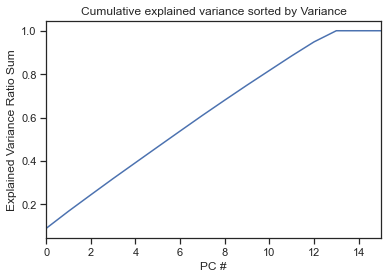

In [64]:
EIG_PAIRS['exp_var_ratio'] = EIG_PAIRS.exp_var/sum(EIG_PAIRS.exp_var)
EIG_PAIRS['exp_var_ratio_sum'] = np.cumsum(EIG_PAIRS.sort_values(by=["exp_var_ratio"], ascending=False).exp_var_ratio)
fig1, ax = plt.subplots()
plt.plot(range(0,len(EIG_PAIRS)), np.cumsum(EIG_PAIRS.sort_values(by=["exp_var_ratio"], ascending=False).exp_var_ratio))
ax.set_xlim(0, 15)
plt.xlabel("PC #")
plt.ylabel("Explained Variance Ratio Sum")
plt.title("Cumulative explained variance sorted by Variance")
plt.show()

In [65]:
#Top 10 PCA
EIG_PAIRS_top_10 = EIG_PAIRS.nlargest(10,"exp_var").reset_index(drop=True)
EIG_PAIRS_top_10.index.name = 'comp_id'
EIG_PAIRS_top_10.index = ["PC"+str(x) for x in range(10)]
EIG_PAIRS_top_10 = EIG_PAIRS_top_10.drop(columns=["eig_val","exp_var"])
EIG_PAIRS_top_10

362813    326536    231221    384050     19362     54354    194290  \
PC0 -0.187557  0.088810  0.058088 -0.142260  0.067149  0.195945  0.043816   
PC1  0.158115  0.061883  0.265511  0.128356  0.046392 -0.241571  0.030531   
PC2 -0.153594 -0.107125 -0.022713 -0.129939 -0.080532 -0.557937 -0.052851   
PC3  0.117563  0.234247 -0.228743  0.093615  0.177815 -0.265884  0.115569   
PC4 -0.191102  0.318358  0.142173 -0.159109  0.241944 -0.112056  0.157066   
PC5  0.102826  0.314739 -0.006413  0.083842  0.239001  0.039193  0.155281   
PC6 -0.069309 -0.091290  0.275244 -0.054242 -0.069351 -0.093110 -0.045039   
PC7  0.186154 -0.123289  0.054909  0.156369 -0.093744  0.065866 -0.060826   
PC8  0.198113 -0.093447 -0.075386  0.130408 -0.070996  0.136136 -0.046103   
PC9  0.436340 -0.011610  0.065205  0.340284 -0.008556  0.080220 -0.005728   

       339483    212317    389341  ...     26005     54789     58584  \
PC0  0.031721  0.152326  0.132629  ...  0.000835  0.000835  0.000835   
PC1  0.142459  0.129730  0.243815  ...  0.000582  0.000582  0.000582   
PC2 -0.011547  0.203380  0.129457  ... -0.001007 -0.001007 -0.001007   
PC3 -0.122453 -0.075260 -0.260894  ...  0.002203  0.002203  0.002203   
PC4  0.076155 -0.254211  0.017594  ...  0.002993  0.002993  0.002993   
PC5 -0.003234  0.046218 -0.001237  ...  0.002959  0.002959  0.002959   
PC6  0.147521 -0.535575  0.012402  ... -0.000858 -0.000858 -0.000858   
PC7  0.030886 -0.075548 -0.050135  ... -0.001159 -0.001159 -0.001159   
PC8 -0.040078 -0.034117  0.075149  ... -0.000879 -0.000879 -0.000879   
PC9  0.034120 -0.147234 -0.053448  ... -0.000109 -0.000109 -0.000109   

        58736     65279     79055     83931     99114  exp_var_ratio  \
PC0  0.000835  0.000835  0.000835  0.000835  0.000835         0.0888   
PC1  0.000582  0.000582  0.000582  0.000582  0.000582         0.0790   
PC2 -0.001007 -0.001007 -0.001007 -0.001007 -0.001007         0.0757   
PC3  0.002203  0.002203  0.002203  0.002203  0.002203         0.0750   
PC4  0.002993  0.002993  0.002993  0.002993  0.002993         0.0732   
PC5  0.002959  0.002959  0.002959  0.002959  0.002959         0.0730   
PC6 -0.000858 -0.000858 -0.000858 -0.000858 -0.000858         0.0727   
PC7 -0.001159 -0.001159 -0.001159 -0.001159 -0.001159         0.0722   
PC8 -0.000879 -0.000879 -0.000879 -0.000879 -0.000879         0.0703   
PC9 -0.000109 -0.000109 -0.000109 -0.000109 -0.000109         0.0693   

     exp_var_ratio_sum  
PC0             0.0888  
PC1             0.1678  
PC2             0.2435  
PC3             0.3185  
PC4             0.3917  
PC5             0.4647  
PC6             0.5374  
PC7             0.6096  
PC8             0.6799  
PC9             0.7492  

[10 rows x 4002 columns]

In [66]:
#Project top 10 PCA onto TFIDF to create DCM
DCM = TFIDF.dot(EIG_PAIRS_top_10[TERM_IDX].T)

In [67]:
def vis_pcs_doc_source(M, a, b, prefix='PC'):
    sns.scatterplot(data=M, x=prefix + str(a), y=prefix + str(b), 
                    hue='doc_source')

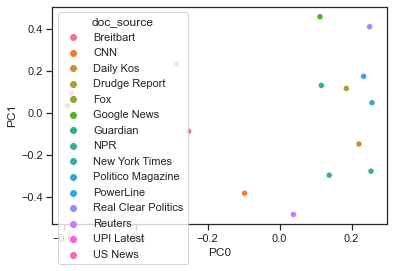

In [68]:
vis_pcs_doc_source(DCM, 0, 1)

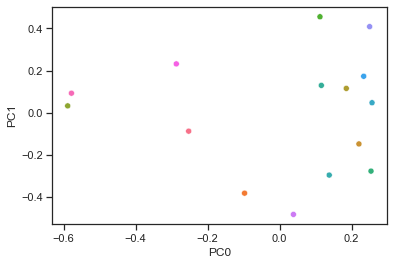

In [69]:
vis_pcs_doc_source(DCM, 0, 1)
plt.legend([],[], frameon=False)

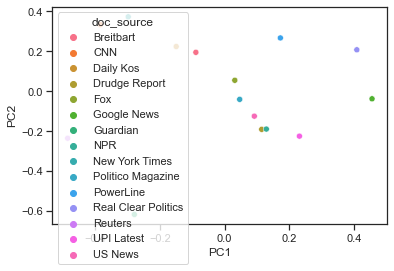

In [70]:
vis_pcs_doc_source(DCM, 1, 2)

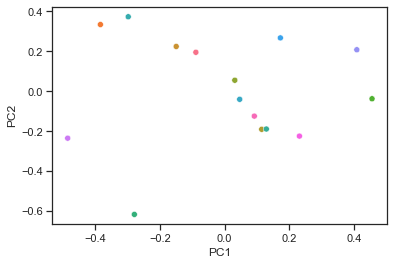

In [71]:
vis_pcs_doc_source(DCM, 1, 2)
plt.legend([],[], frameon=False)

In [72]:
#Save DCM note columns names hold term_id
DCM.to_csv('DCM.csv')
#Table of New Sources and components
EIG_PAIRS_top_10.to_csv("EIG_PAIRS_top_10.csv")
#VOCAB_TFIDF_doc_source_sum is VOCAB joined with TFIDF sum
VOCAB_TFIDF_doc_source_sum.to_csv("VOCAB_TFIDF_doc_source_sum.csv")

### LDA on doc_id

In [73]:
n_terms = 4000
n_topics = 30
max_iter = 5
OHCO = ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

%matplotlib inline

In [75]:
#TOKEN = pd.read_csv('TOKEN.csv').set_index(OHCO)

Doc_id = TOKEN[TOKEN.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:2]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [76]:
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(Doc_id.doc_str)
TERMS = tfv.get_feature_names()

In [77]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [78]:
#Table of document and topic concentrations
THETA = pd.DataFrame(lda.fit_transform(tf), index=Doc_id.index)
THETA.columns.name = 'topic_id'

In [79]:
THETA.sample(20).style.background_gradient()

In [80]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [81]:
PHI.T.head().style.background_gradient()

In [82]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [83]:
TOPICS

term_str              0           1           2            3             4  \
topic_id                                                                     
0                   man        home      police        death          body   
1               climate         ban      change       energy     companies   
2                border        jobs  protesters        plans       economy   
3             candidate       money       weeks    executive         order   
4              election    campaign      report     abortion       release   
5                 crash      police         man      vehicle        driver   
6                 trade     weekend       talks     earnings      minister   
7                  year         boy         son         girl     community   
8                   man       years      prison        trial         judge   
9                  race    attorney       state         seat           day   
10                media       court       press    documents          news   
11          immigration       video  immigrants        rally     activists   
12                 game     victory    coverage       season           win   
13                 news    articles      forces       points          food   
14                state  government   lawmakers       budget     officials   
15               season      people      cancer       deaths      violence   
16                image      credit        town         work         plane   
17                  tax      voters       party     election       percent   
18            president       women      speech      reading     statement   
19        investigation       abuse         sex  allegations       assault   
20                  oil         gun     company     governor         coast   
21          authorities       woman         car       police           man   
22                 city      police      people    officials      building   
23                  law       court      rights        judge         state   
24                story        link      column    advertise        second   
25             contract        film       visit      quarter           aid   
26               school    students    children      student       parents   
27               health    coverage        deal         care     insurance   
28                 star      leader      record   opposition       history   
29            officials    security     meeting  impeachment  intelligence   

term_str             5               6             7          8  \
topic_id                                                          
0                woman     authorities       officer     murder   
1                power          travel    scientists      coach   
2             coverage            rate          trip     market   
3                 time            book           way      world   
4         interference            role         email       time   
5              members           truck        people     deputy   
6               series             air       defense    tariffs   
7                  war      production          face     mother   
8                 case         charges   prosecutors       life   
9              general            team      campaign   district   
10             justice       president          case    hearing   
11             country          border        people      group   
12                team           night          time      round   
13           countries          troops        attack     strike   
14             funding           water      proposal   shutdown   
15           thousands         country      coverage  lawmakers   
16              people             lot       airport   hundreds   
17          candidates          people      campaign  president   
18          misconduct         college         crime   comments   
19             counsel       interview         probe        use   
20           officials       

In [84]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [85]:
TOPICS.label

topic_id
0        0 man home police death body woman authorities
1     1 climate ban change energy companies power tr...
2     2 border jobs protesters plans economy coverag...
3     3 candidate money weeks executive order time book
4     4 election campaign report abortion release in...
5       5 crash police man vehicle driver members truck
6     6 trade weekend talks earnings minister series...
7          7 year boy son girl community war production
8           8 man years prison trial judge case charges
9           9 race attorney state seat day general team
10    10 media court press documents news justice pr...
11    11 immigration video immigrants rally activist...
12       12 game victory coverage season win team night
13    13 news articles forces points food countries ...
14    14 state government lawmakers budget officials...
15    15 season people cancer deaths violence thousa...
16           16 image credit town work plane people lot
17    17 tax voters party election perc

In [86]:
TOPICS['doc_weight_sum'] = THETA.sum()

<AxesSubplot:ylabel='label'>

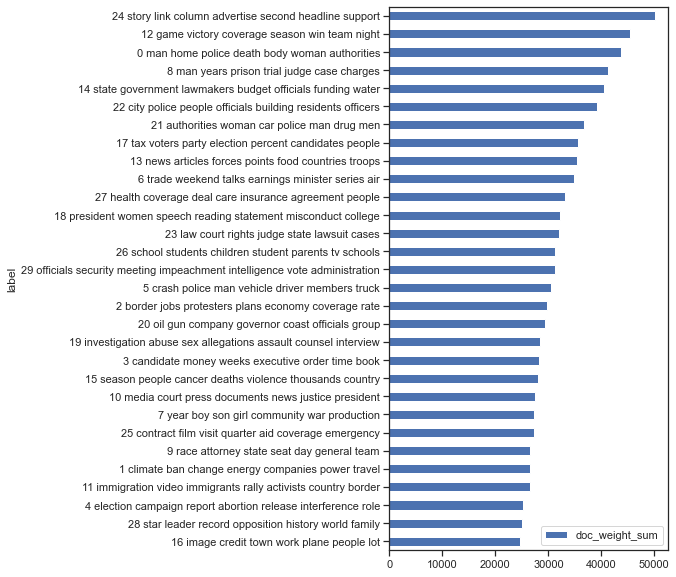

In [87]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

In [88]:
#Explore topics by Doc_Source
topic_cols = [t for t in range(n_topics)]
Doc_Source = THETA.groupby('doc_source')[topic_cols].mean().T                                            
Doc_Source.index.name = 'topic_id'

In [89]:
Doc_Source['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [90]:
Doc_Source.sort_values('Fox', ascending=False).style.background_gradient()

In [91]:
Doc_Source.sort_values('CNN', ascending=False).style.background_gradient()

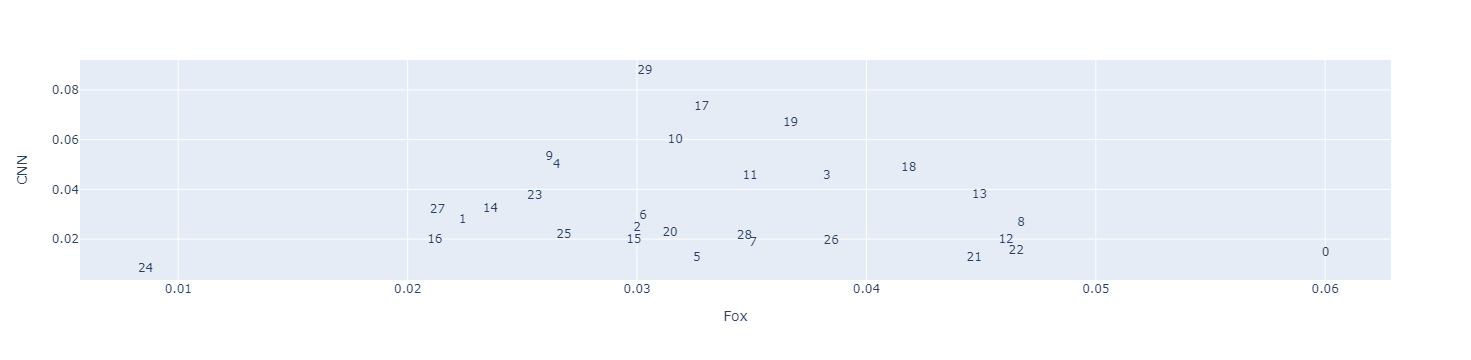

In [92]:
import plotly_express as px

px.scatter(Doc_Source.reset_index(), 'Fox', 'CNN', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

Cluster topics

In [93]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [94]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [95]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

In [96]:
labels  = ["{}: {}".format(a,b) for a, b in zip(Doc_Source.index,  Doc_Source.topterms.tolist())]

<Figure size 432x288 with 0 Axes>

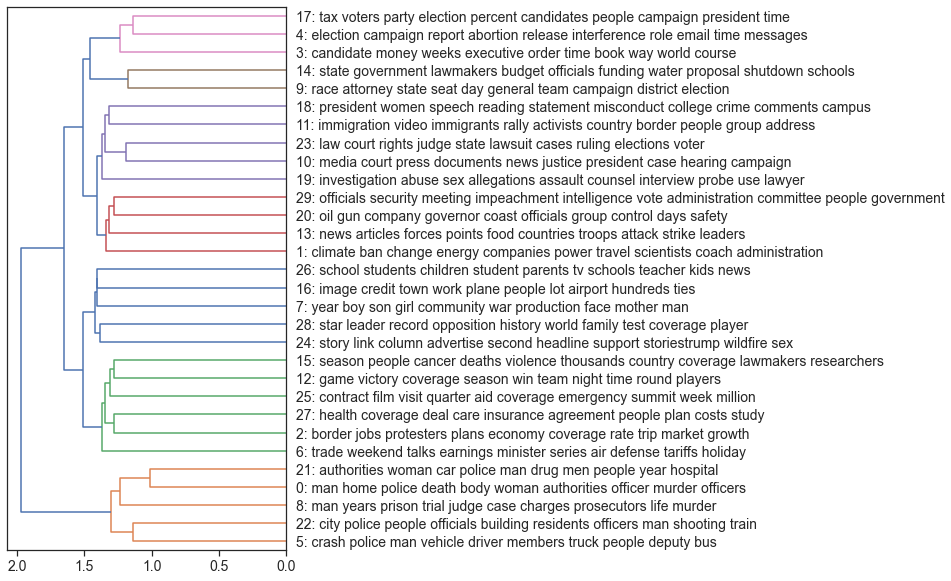

In [97]:
plot_tree(TREE, labels)

In [98]:
#Save PHI.T note index hold term_id
PHI.T.to_csv('PHI_T.csv')
#Table of document and topic concentrations is THETA
THETA.to_csv('THETA.csv')

### Word2Vec on doc_id

In [99]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly.express as px

%matplotlib inline

OHCO = ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']
#paragraphs (only 1 paragraph per document.)
BAG = OHCO[:3]

window = 5

In [100]:
#TOKEN = pd.read_csv('TOKEN.csv').set_index(OHCO)
#LIB = pd.read_csv('LIB.csv').set_index('doc_id')

TOKENS = TOKEN.join(LIB, on="doc_id").drop(columns=["doc_title", "doc_url","doc_date"])
TOKENS

pos_tuple  \
doc_source  doc_id  doc_title                                          sent_num token_num                           
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           ('Washington', 'NNP')   
                                                                                1               ('Post50', 'NNP')   
                                                                                2                ('Years', 'NNP')   
                                                                                3                  ('on,', 'VBZ')   
                                                                                4              ('Finding', 'NNP')   
...                                                                                                           ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                  ('for', 'IN')   
                                                                                17             ('Disease', 'NNP')   
                                                                                18             ('Control', 'NNP')   
                                                                                19                  ('and', 'CC')   
                                                                                20         ('Prevention.', 'NNP')   

                                                                                           pos  \
doc_source  doc_id  doc_title                                          sent_num token_num        
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          NNP   
                                                                                1          NNP   
                                                                                2          NNP   
                                                                                3          VBZ   
                                                                                4          NNP   
...                                                                                        ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16          IN   
                                                                                17         NNP   
                                                                                18         NNP   
                                                                                19          CC   
                                                                                20         NNP   

                                                                                             token_str  \
doc_source  doc_id  doc_title                                          sent_num token_num                
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           Washington   
                                                                                1               Post50   
                                                                                2                Years   
                                                                                3                  on,   
                                                                                4              Finding   
...                                                                                                ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                 for   
                                                                                17             Disease   
                                                                                18             Control   
                                                                                19                 and   
                                   

In [101]:
#separate Token df
TOK_group = TOKENS.groupby(TOKENS.doc_source)
Fox = TOK_group.get_group("Fox").drop(columns=['doc_source'])
CNN = TOK_group.get_group("CNN").drop(columns=['doc_source'])
NYT = TOK_group.get_group("New York Times").drop(columns=['doc_source'])
Fox.head()

pos_tuple  \
doc_source doc_id doc_title                                          sent_num token_num                        
Fox        242    Who's to blame? ObamaCare architect says rocky ... 0        0           ('Ezekiel', 'NNP')   
                                                                              1          ('Emanuel,', 'NNP')   
                                                                              2            ('right,', 'VBZ')   
                                                                              3                ('the', 'DT')   
                                                                              4          ('architect', 'NN')   

                                                                                         pos  \
doc_source doc_id doc_title                                          sent_num token_num        
Fox        242    Who's to blame? ObamaCare architect says rocky ... 0        0          NNP   
                                                                              1          NNP   
                                                                              2          VBZ   
                                                                              3           DT   
                                                                              4           NN   

                                                                                         token_str  \
doc_source doc_id doc_title                                          sent_num token_num              
Fox        242    Who's to blame? ObamaCare architect says rocky ... 0        0            Ezekiel   
                                                                              1           Emanuel,   
                                                                              2             right,   
                                                                              3                the   
                                                                              4          architect   

                                                                                          term_str  \
doc_source doc_id doc_title                                          sent_num token_num              
Fox        242    Who's to blame? ObamaCare architect says rocky ... 0        0            ezekiel   
                                                                              1            emanuel   
                                                                              2              right   
                                                                              3                the   
                                                                              4          architect   

                                                                                         term_id  
doc_source doc_id doc_title                                          sent_num token_num           
Fox        242    Who's to blame? ObamaCare architect says rocky ... 0        0           119096  
                                                                              1           108767  
                                                                              2           288223  
                                                                              3           339302  
                                                                              4            30260

In [102]:
#create Fox corpus
corpus_Fox = Fox[~Fox.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [103]:
#create CNN corpus
corpus_CNN = CNN[~CNN.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [104]:
#create New York Times corpus
corpus_NYT = NYT[~NYT.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [105]:
#create TOKENS corpus
TOKENS_temp = TOKENS.drop(columns=['doc_source'])
corpus_TOKENS = TOKENS_temp[~TOKENS_temp.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [106]:
TOKENS_temp

pos_tuple  \
doc_source  doc_id  doc_title                                          sent_num token_num                           
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           ('Washington', 'NNP')   
                                                                                1               ('Post50', 'NNP')   
                                                                                2                ('Years', 'NNP')   
                                                                                3                  ('on,', 'VBZ')   
                                                                                4              ('Finding', 'NNP')   
...                                                                                                           ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                  ('for', 'IN')   
                                                                                17             ('Disease', 'NNP')   
                                                                                18             ('Control', 'NNP')   
                                                                                19                  ('and', 'CC')   
                                                                                20         ('Prevention.', 'NNP')   

                                                                                           pos  \
doc_source  doc_id  doc_title                                          sent_num token_num        
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0          NNP   
                                                                                1          NNP   
                                                                                2          NNP   
                                                                                3          VBZ   
                                                                                4          NNP   
...                                                                                        ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16          IN   
                                                                                17         NNP   
                                                                                18         NNP   
                                                                                19          CC   
                                                                                20         NNP   

                                                                                             token_str  \
doc_source  doc_id  doc_title                                          sent_num token_num                
Google News 39      50 Years on, Finding Profit in 'Truth' on JFK C... 0        0           Washington   
                                                                                1               Post50   
                                                                                2                Years   
                                                                                3                  on,   
                                                                                4              Finding   
...                                                                                                ...   
CNN         1026382 Trump puts Pence in charge of coronavirus efforts  0        16                 for   
                                                                                17             Disease   
                                                                                18             Control   
                                                                                19                 and   
                                   

In [107]:
#Fox model
model_Fox = word2vec.Word2Vec(corpus_Fox, vector_size=246, window=window, min_count=200, workers=4)

#CNN model
model_CNN = word2vec.Word2Vec(corpus_CNN, vector_size=246, window=window, min_count=200, workers=4)

#NYT model
model_NYT = word2vec.Word2Vec(corpus_NYT, vector_size=246, window=window, min_count=200, workers=4)

#TOKENS model
model_TOKENS = word2vec.Word2Vec(corpus_TOKENS, vector_size=246, window=window, min_count=200, workers=4)

Visualize with tSNE

In [108]:
coords_Fox = pd.DataFrame(index=range(len(model_Fox.wv.key_to_index)))
coords_Fox['label'] = [w for w in model_Fox.wv.key_to_index]
coords_Fox['vector'] = coords_Fox['label'].apply(lambda x: model_Fox.wv.get_vector(x))

In [109]:
coords_CNN = pd.DataFrame(index=range(len(model_CNN.wv.key_to_index)))
coords_CNN['label'] = [w for w in model_CNN.wv.key_to_index]
coords_CNN['vector'] = coords_CNN['label'].apply(lambda x: model_CNN.wv.get_vector(x))

In [110]:
coords_NYT = pd.DataFrame(index=range(len(model_NYT.wv.key_to_index)))
coords_NYT['label'] = [w for w in model_NYT.wv.key_to_index]
coords_NYT['vector'] = coords_NYT['label'].apply(lambda x: model_NYT.wv.get_vector(x))

In [111]:
coords_TOKENS = pd.DataFrame(index=range(len(model_TOKENS.wv.key_to_index)))
coords_TOKENS['label'] = [w for w in model_TOKENS.wv.key_to_index]
coords_TOKENS['vector'] = coords_TOKENS['label'].apply(lambda x: model_TOKENS.wv.get_vector(x))

In [112]:
coords_Fox.head()

label                                             vector
0   the  [0.1082992, 0.35250807, 0.022041041, 0.0493158...
1     a  [0.58033395, -0.23901638, -0.16874905, 0.05973...
2    to  [0.395242, -0.30904365, -0.33012113, -0.494240...
3    of  [-0.1796086, -0.11399872, 0.5893242, 0.1629094...
4    in  [0.10063187, 0.36018485, 0.07975656, 0.3104392...

In [113]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_Fox = tsne_model.fit_transform(coords_Fox['vector'].tolist())

tsne_values_CNN = tsne_model.fit_transform(coords_CNN['vector'].tolist())

tsne_values_NYT = tsne_model.fit_transform(coords_NYT['vector'].tolist())

tsne_values_TOKENS = tsne_model.fit_transform(coords_TOKENS['vector'].tolist())

In [114]:
coords_Fox['x'] = tsne_values_Fox[:,0]
coords_Fox['y'] = tsne_values_Fox[:,1]

coords_CNN['x'] = tsne_values_CNN[:,0]
coords_CNN['y'] = tsne_values_CNN[:,1]

coords_NYT['x'] = tsne_values_NYT[:,0]
coords_NYT['y'] = tsne_values_NYT[:,1]

coords_TOKENS['x'] = tsne_values_TOKENS[:,0]
coords_TOKENS['y'] = tsne_values_TOKENS[:,1]

In [115]:
coords_Fox.head()

label                                             vector          x  \
0   the  [0.1082992, 0.35250807, 0.022041041, 0.0493158...   9.225942   
1     a  [0.58033395, -0.23901638, -0.16874905, 0.05973... -14.318678   
2    to  [0.395242, -0.30904365, -0.33012113, -0.494240...  12.242903   
3    of  [-0.1796086, -0.11399872, 0.5893242, 0.1629094...  -3.335131   
4    in  [0.10063187, 0.36018485, 0.07975656, 0.3104392...  -3.932981   

           y  
0  18.556696  
1  -8.883310  
2  -8.647508  
3   5.293119  
4   6.777760

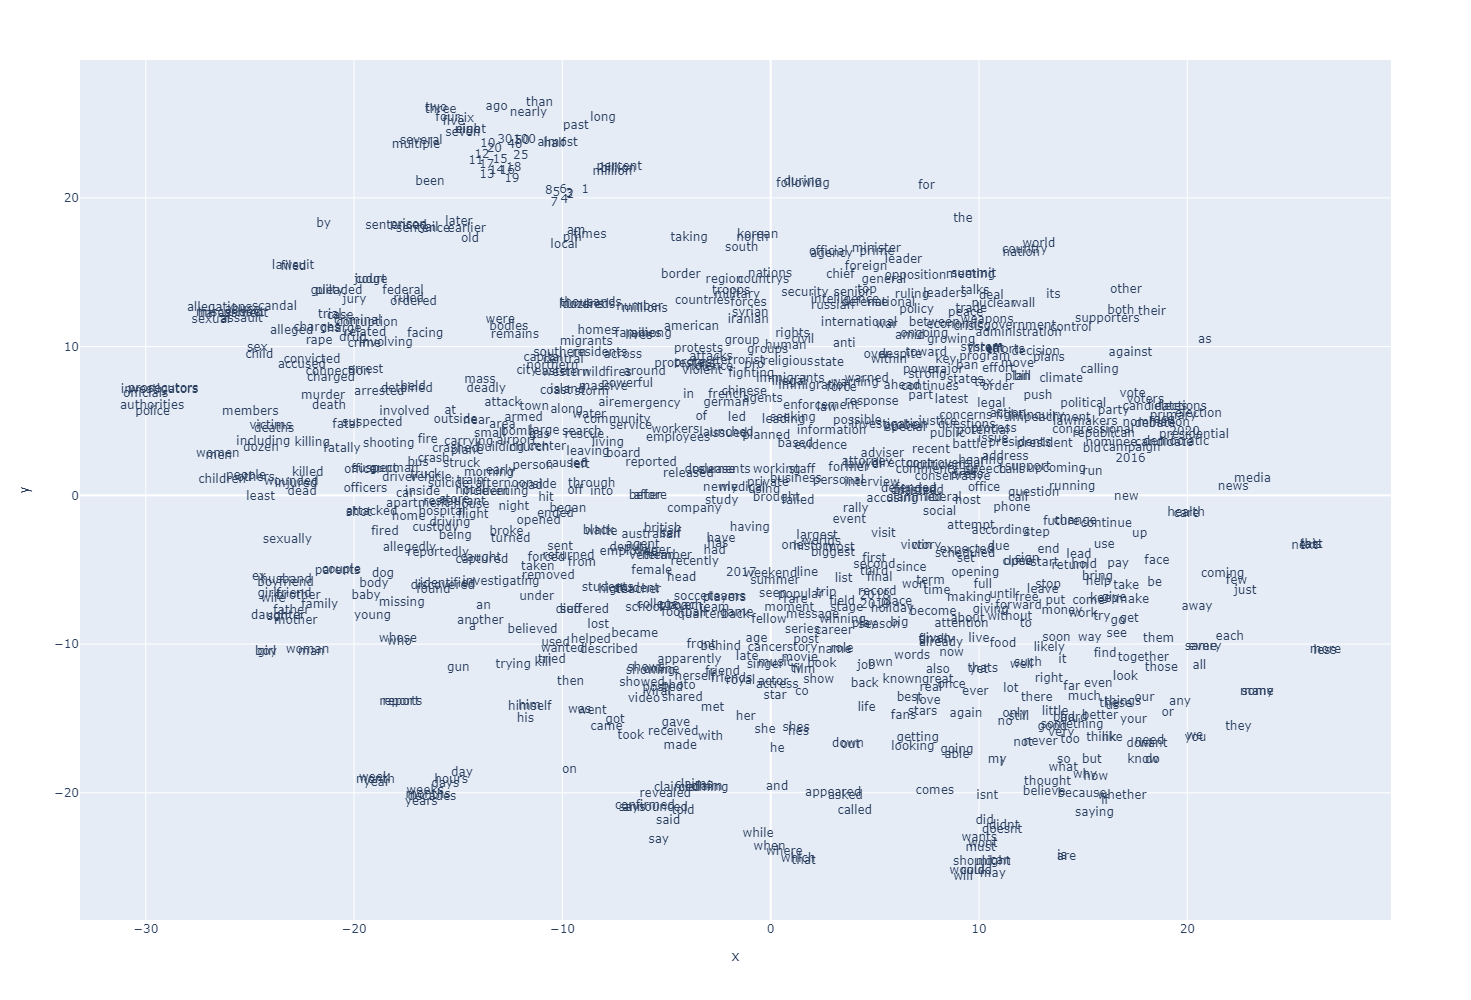

In [116]:
px.scatter(coords_Fox, 'x', 'y', text='label', height=1000).update_traces(mode='text')

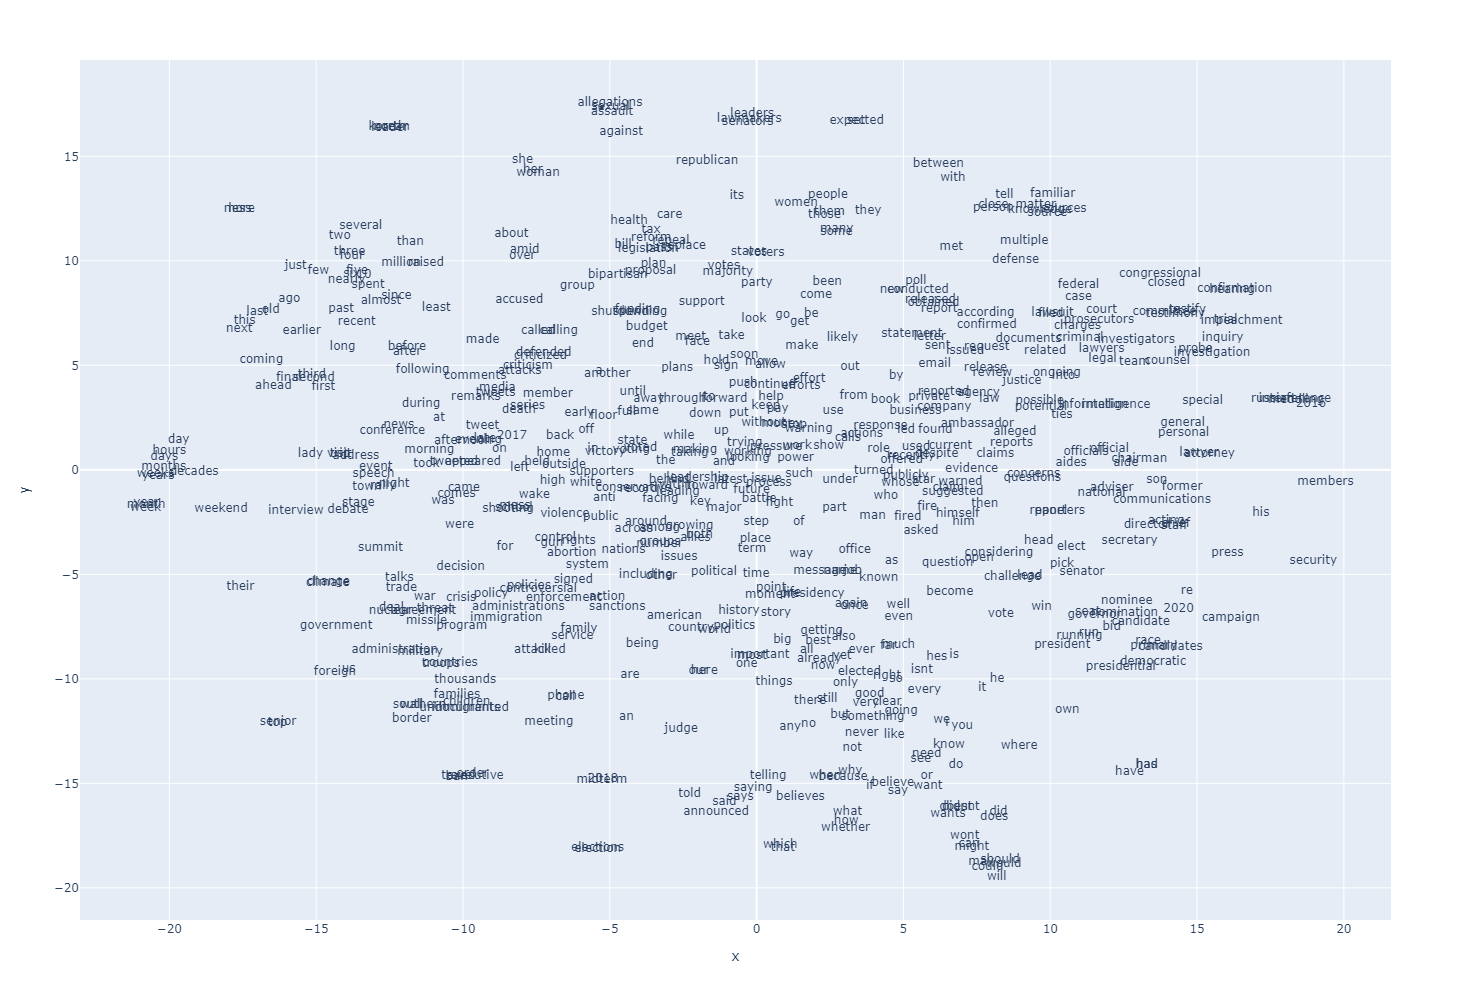

In [117]:
px.scatter(coords_CNN, 'x', 'y', text='label', height=1000).update_traces(mode='text')

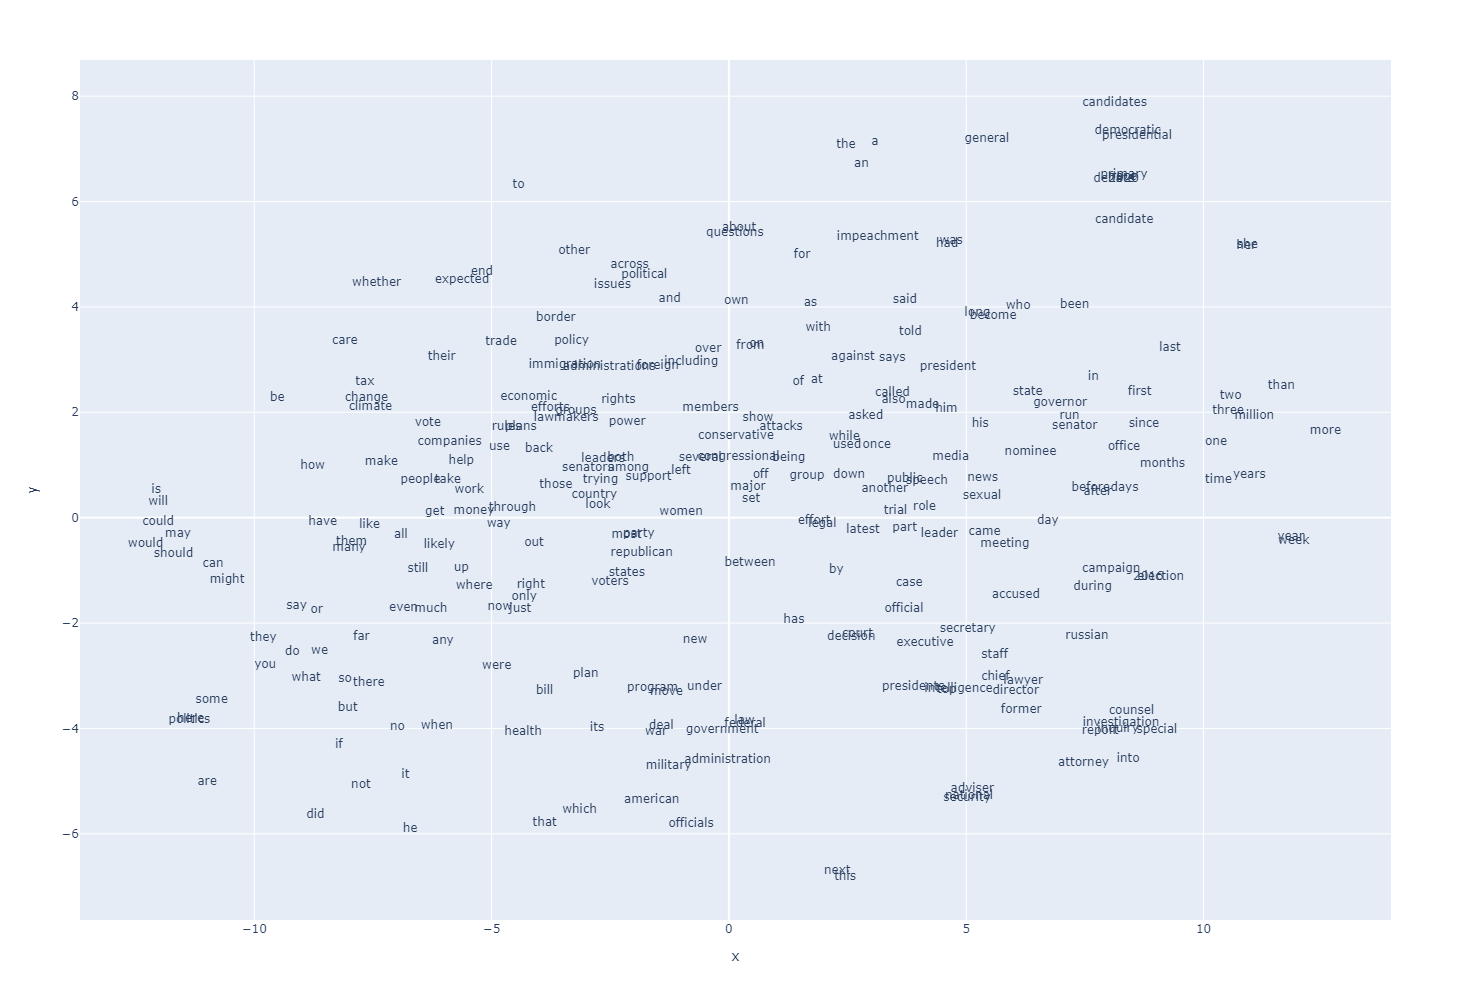

In [118]:
px.scatter(coords_NYT, 'x', 'y', text='label', height=1000).update_traces(mode='text')

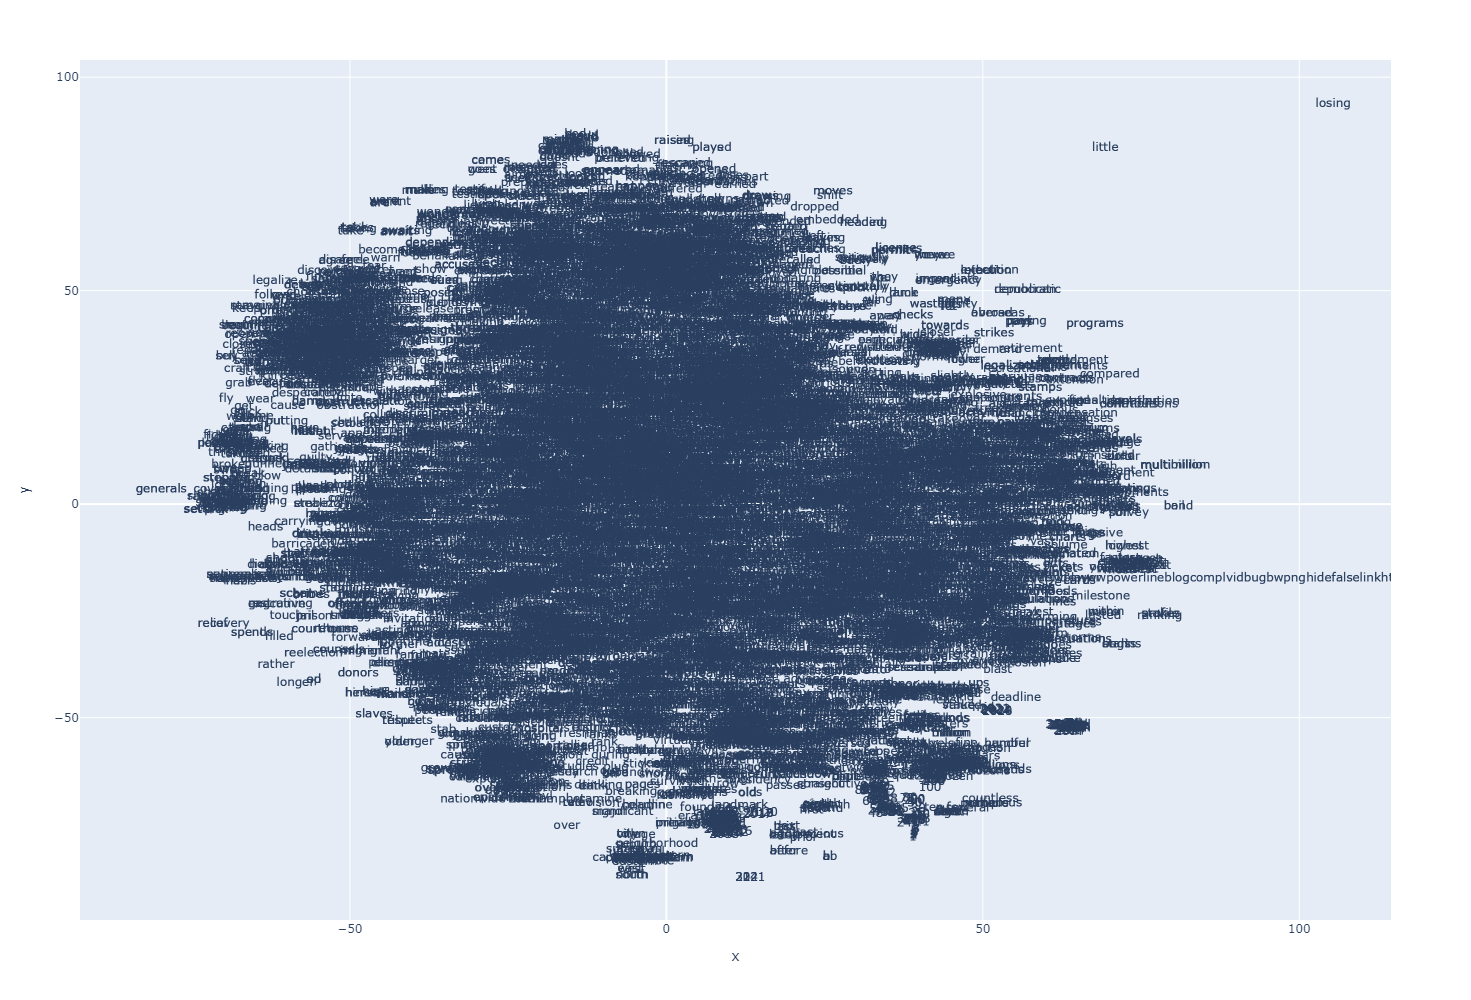

In [119]:
px.scatter(coords_TOKENS, 'x', 'y', text='label', height=1000).update_traces(mode='text')

In [120]:
#Save cords, note labels column hold term_str
coords_Fox.to_csv('coords_Fox.csv')
coords_CNN.to_csv('coords_CNN.csv')
coords_NYT.to_csv('coords_NYT.csv')
coords_TOKENS.to_csv('coords_TOKENS.csv')

### Sentiment Analysis on doc_id

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
OHCO = ['doc_source', 'doc_id', 'doc_title', 'sent_num', 'token_num']
#TOKEN = pd.read_csv('TOKEN.csv').set_index(OHCO)

doc_id = OHCO[1:2]
sent = OHCO[1:4]

salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [122]:
sns.set()
%matplotlib inline

In [123]:
#Lexicon
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

salex['polarity'] = salex.positive - salex.negative

In [124]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [125]:
TOKENS = TOKEN.sort_index()
TOKENS.head()

pos_tuple  \
doc_source doc_id doc_title                                          sent_num token_num                         
Breitbart  336    Tennis Star del Potro Robbed in Paris After Sto... 0        0                  ('On', 'IN')   
                                                                              1          ('Saturday,', 'NNP')   
                                                                              2              ('tennis', 'NN')   
                                                                              3              ('player', 'NN')   
                                                                              4               ('Juan', 'NNP')   

                                                                                         pos  \
doc_source doc_id doc_title                                          sent_num token_num        
Breitbart  336    Tennis Star del Potro Robbed in Paris After Sto... 0        0           IN   
                                                                              1          NNP   
                                                                              2           NN   
                                                                              3           NN   
                                                                              4          NNP   

                                                                                         token_str  \
doc_source doc_id doc_title                                          sent_num token_num              
Breitbart  336    Tennis Star del Potro Robbed in Paris After Sto... 0        0                 On   
                                                                              1          Saturday,   
                                                                              2             tennis   
                                                                              3             player   
                                                                              4               Juan   

                                                                                         term_str  \
doc_source doc_id doc_title                                          sent_num token_num             
Breitbart  336    Tennis Star del Potro Robbed in Paris After Sto... 0        0                on   
                                                                              1          saturday   
                                                                              2            tennis   
                                                                              3            player   
                                                                              4              juan   

                                                                                         term_id  
doc_source doc_id doc_title                                          sent_num token_num           
Breitbart  336    Tennis Star del Potro Robbed in Paris After Sto... 0        0           241055  
                                                                              1           296013  
                                                                              2           337834  
                                                                              3           258026  
                                                                              4           178131

In [126]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

TOKENS[['term_str'] + emo_cols].sample(10)

term_str  \
doc_source doc_id doc_title                                          sent_num token_num             
US News    431712 Senate Passes Kansas State Fair Tax Bill           0        20              for   
UPI Latest 134370 Constance Wu and Gemma Chan start work on 'Craz... 0        16            crazy   
US News    761267 Greek PM Says He Will Revive Bid for German WWI... 0        0           greeces   
Guardian   736970 Donald Trump is using Stalinist techniques agai... 1        39           change   
UPI Latest 464266 Iranian-led panel said human error led to sinki... 0        24            found   
US News    421983 The Latest: Boy Shot at School Released From Ho... 1        13               14   
           604603 Hawaii Plans Veterans Home on Former Aiea Sugar... 0        0            hawaii   
           457594 Judge Bars DNA Evidence Obtained by 'Unreasonab... 0        6          evidence   
           447685 California's Occupational Safety Agency Starts ... 0        5               for   
           474333 Bomb Victim's Ex-Boyfriend Held on Explosives C... 0        18             with   

                                                                                         anger  \
doc_source doc_id doc_title                                          sent_num token_num          
US News    431712 Senate Passes Kansas State Fair Tax Bill           0        20           0.0   
UPI Latest 134370 Constance Wu and Gemma Chan start work on 'Craz... 0        16           1.0   
US News    761267 Greek PM Says He Will Revive Bid for German WWI... 0        0            0.0   
Guardian   736970 Donald Trump is using Stalinist techniques agai... 1        39           0.0   
UPI Latest 464266 Iranian-led panel said human error led to sinki... 0        24           0.0   
US News    421983 The Latest: Boy Shot at School Released From Ho... 1        13           0.0   
           604603 Hawaii Plans Veterans Home on Former Aiea Sugar... 0        0            0.0   
           457594 Judge Bars DNA Evidence Obtained by 'Unreasonab... 0        6            0.0   
           447685 California's Occupational Safety Agency Starts ... 0        5            0.0   
           474333 Bomb Victim's Ex-Boyfriend Held on Explosives C... 0        18           0.0   

                                                                                         anticipation  \
doc_source doc_id doc_title                                          sent_num token_num                 
US News    431712 Senate Passes Kansas State Fair Tax Bill           0        20                  0.0   
UPI Latest 134370 Constance Wu and Gemma Chan start work on 'Craz... 0        16                  0.0   
US News    761267 Greek PM Says He Will Revive Bid for German WWI... 0        0                   0.0   
Guardian   736970 Donald Trump is using Stalinist techniques agai... 1        39                  0.0   
UPI Latest 464266 Iranian-led panel said human error led to sinki... 0        24                  0.0   
US News    421983 The Latest: Boy Shot at School Released From Ho... 1        13                  0.0   
           604603 Hawaii Plans Veterans Home on Former Aiea Sugar... 0        0                   0.0   
           457594 Judge Bars DNA Evidence Obtained by 'Unreasonab... 0        6                   0.0   
           447685 California's Occupational Safety Agency Starts ... 0        5                   0.0   
           474333 Bomb Victim's Ex-Boyfriend Held on Explosives C... 0        18                  0.0   

                                                                                         disgust  \
doc_source doc_id doc_title                                          sent_num token_num            
US News    431712 Senate Passes Kansas State Fair Tax Bill           0        20             0.0   
UPI Latest 134370 Constance Wu and Gemma Chan start work on 'Craz... 0        16             0.0   
US News    761267 Greek PM Says He Wil

In [127]:
Fox = TOKENS.loc['Fox'].copy()
CNN = TOKENS.loc['CNN'].copy()
NYT = TOKENS.loc['New York Times'].copy()

In [128]:
Fox[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

<AxesSubplot:>

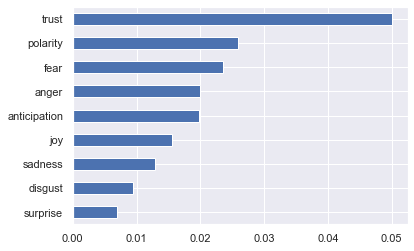

In [129]:
CNN[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

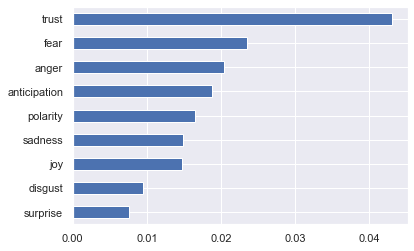

In [130]:
NYT[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

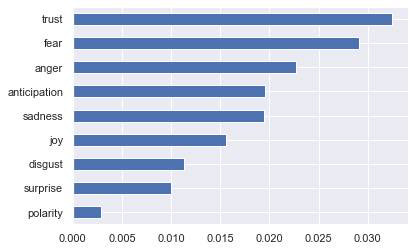

In [131]:
TOKENS[emo_cols].mean().sort_values().plot.barh()

In [132]:
Fox_emo = Fox.groupby(doc_id)[emo_cols].mean()

CNN_emo = CNN.groupby(doc_id)[emo_cols].mean()

NYT_emo = NYT.groupby(doc_id)[emo_cols].mean()

TOKENS_emo = TOKENS.groupby(doc_id)[emo_cols].mean()

TOKENS_emo_doc_source = TOKENS.groupby('doc_source')[emo_cols].mean()

In [133]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

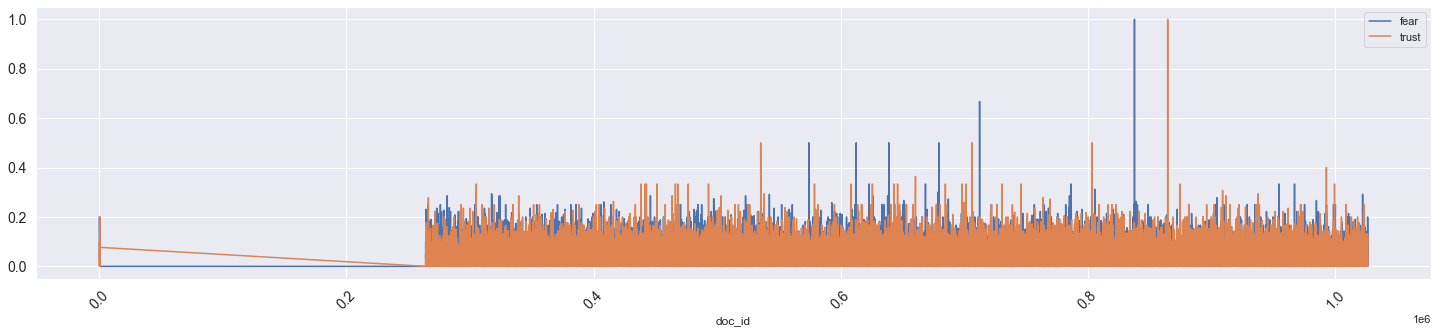

In [134]:
plot_sentiments(Fox_emo, ['fear','trust'])

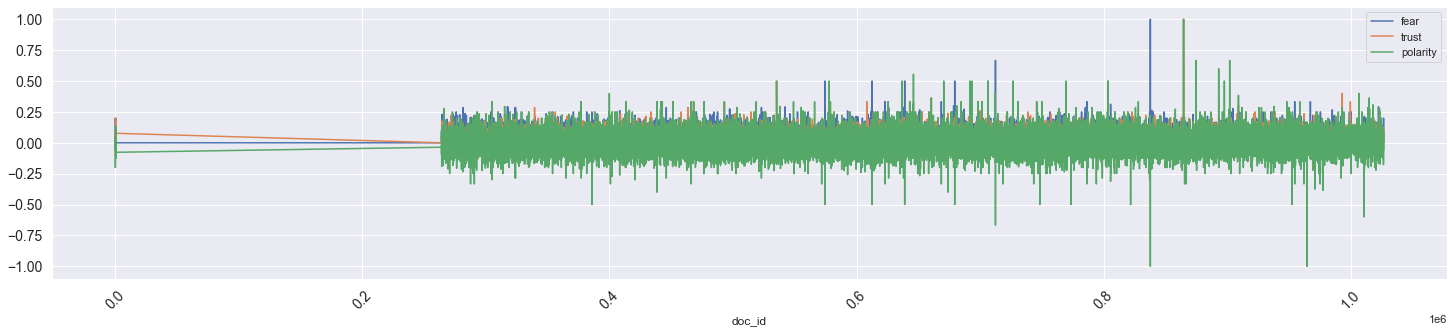

In [135]:
plot_sentiments(Fox_emo, ['fear','trust','polarity'])

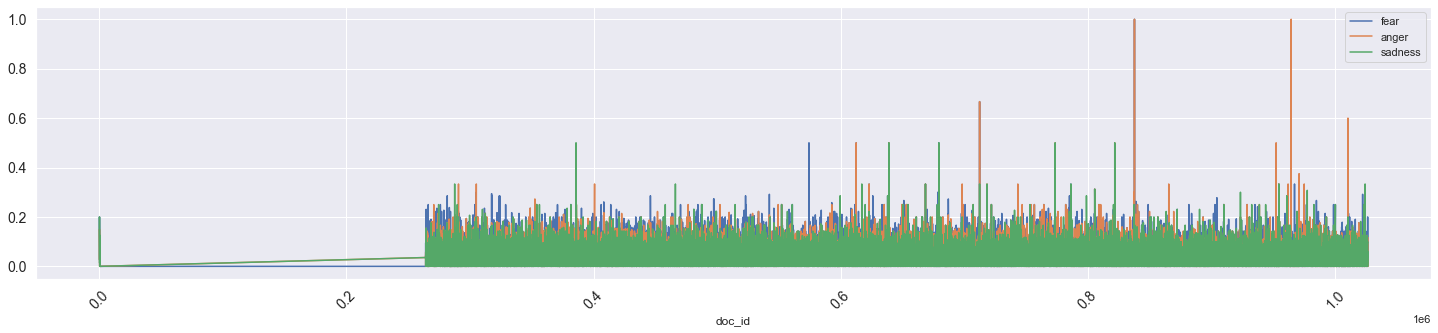

In [136]:
plot_sentiments(Fox_emo, ['fear','anger','sadness'])

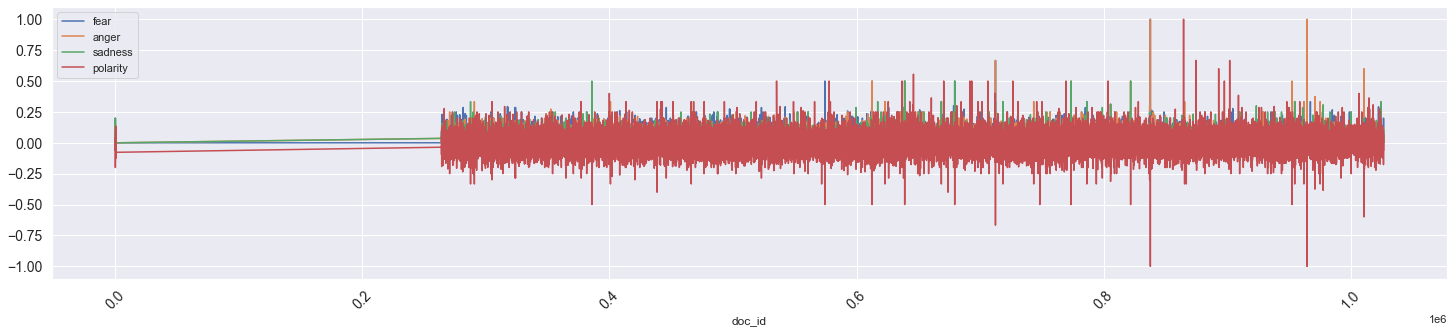

In [137]:
plot_sentiments(Fox_emo, ['fear','anger','sadness','polarity'])

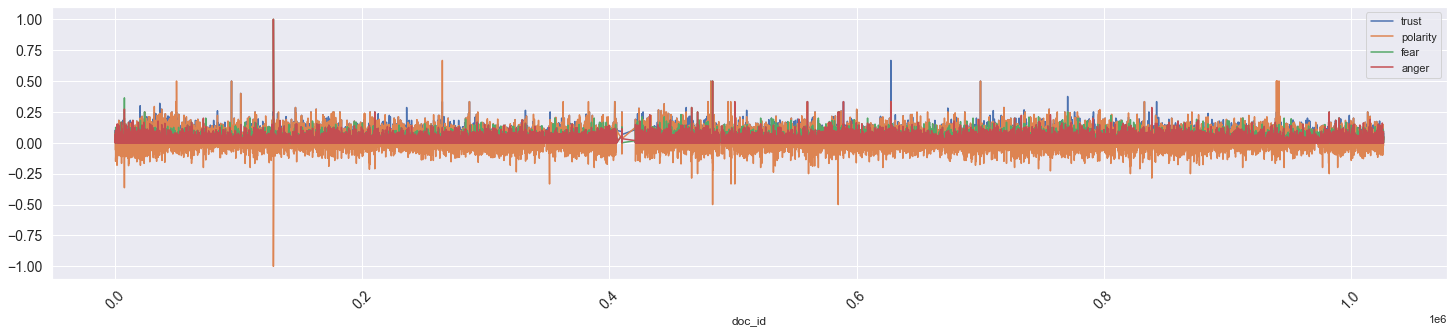

In [138]:
plot_sentiments(CNN_emo, ['trust','polarity','fear', 'anger'])

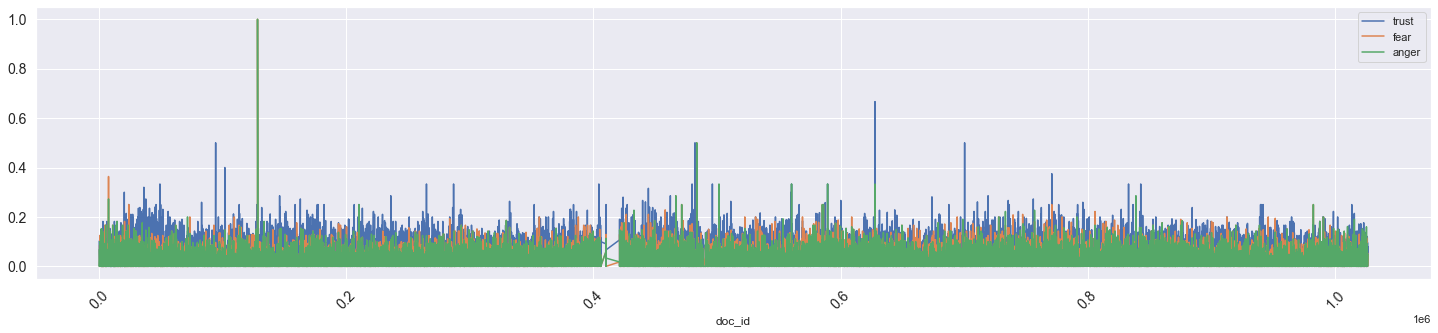

In [139]:
plot_sentiments(CNN_emo, ['trust','fear', 'anger'])

In [140]:
plot_sentiments(NYT_emo, ['fear','trust'])

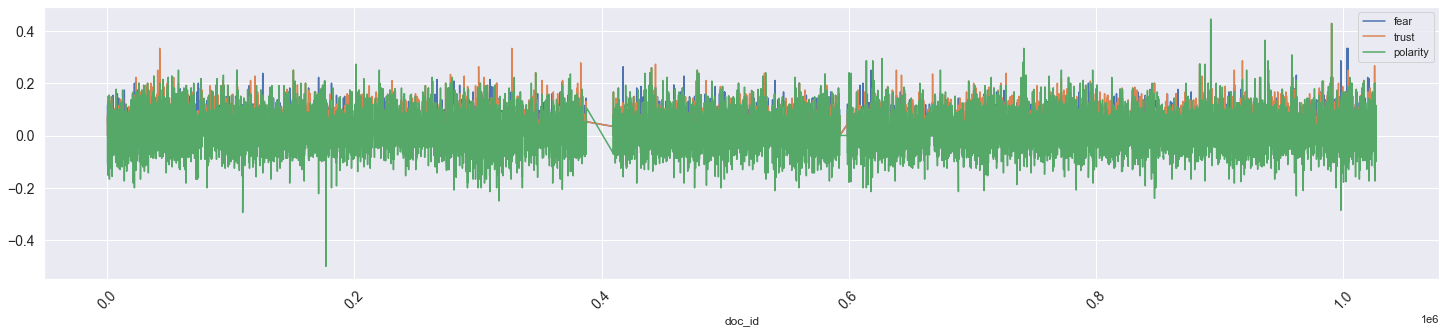

In [141]:
plot_sentiments(NYT_emo, ['fear','trust', 'polarity'])

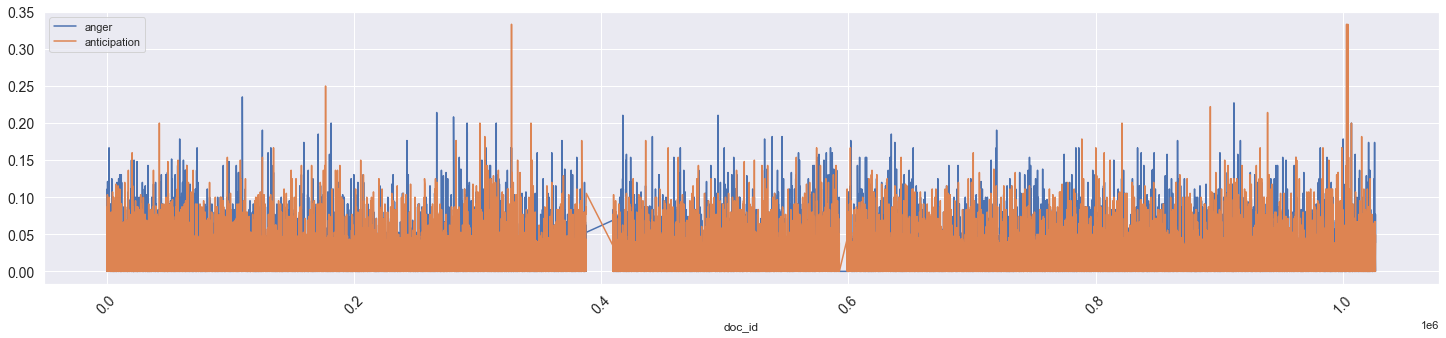

In [142]:
plot_sentiments(NYT_emo, ['anger','anticipation'])

In [143]:
plot_sentiments(NYT_emo, ['anger','anticipation', 'polarity'])

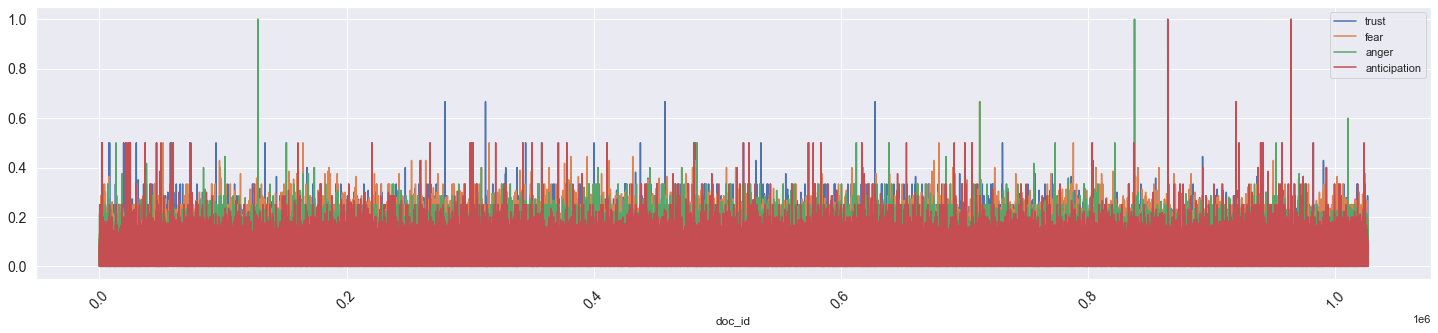

In [144]:
plot_sentiments(TOKENS_emo, ['trust','fear','anger', 'anticipation'])

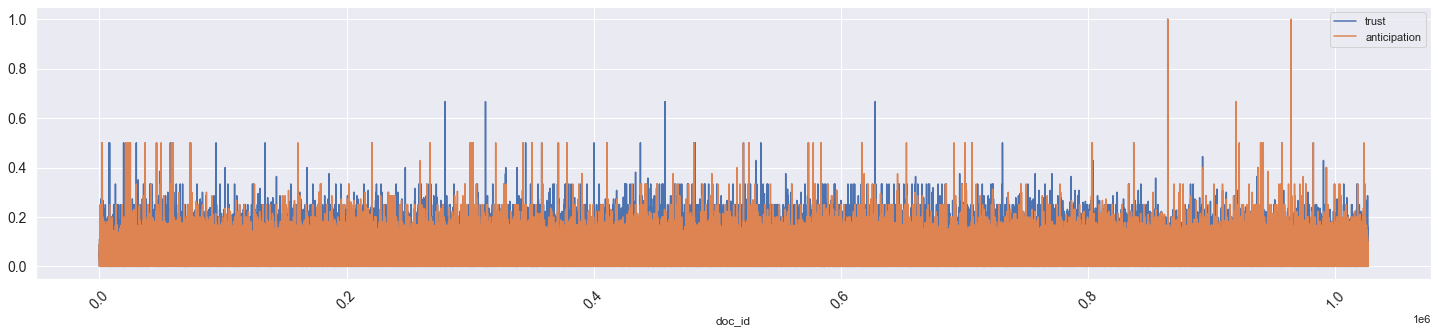

In [145]:
plot_sentiments(TOKENS_emo, ['trust', 'anticipation'])

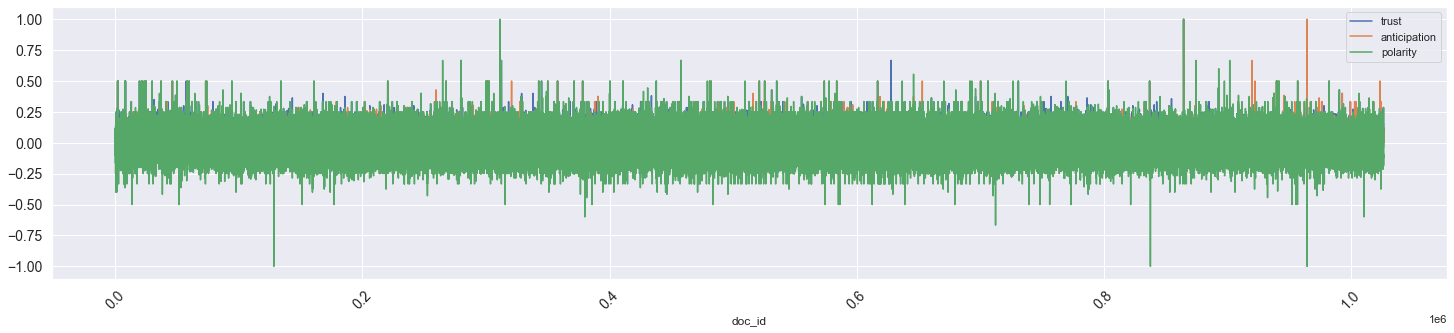

In [146]:
plot_sentiments(TOKENS_emo, ['trust','anticipation','polarity'])

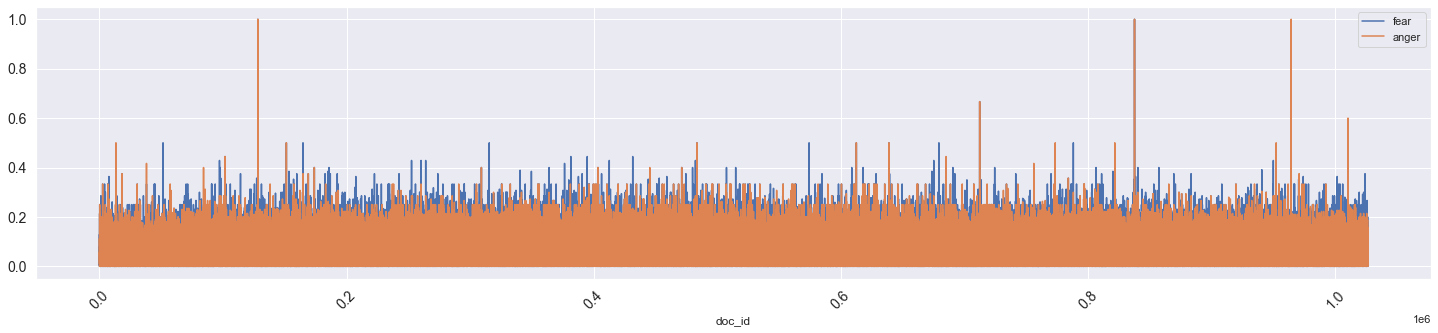

In [147]:
plot_sentiments(TOKENS_emo, ['fear','anger'])

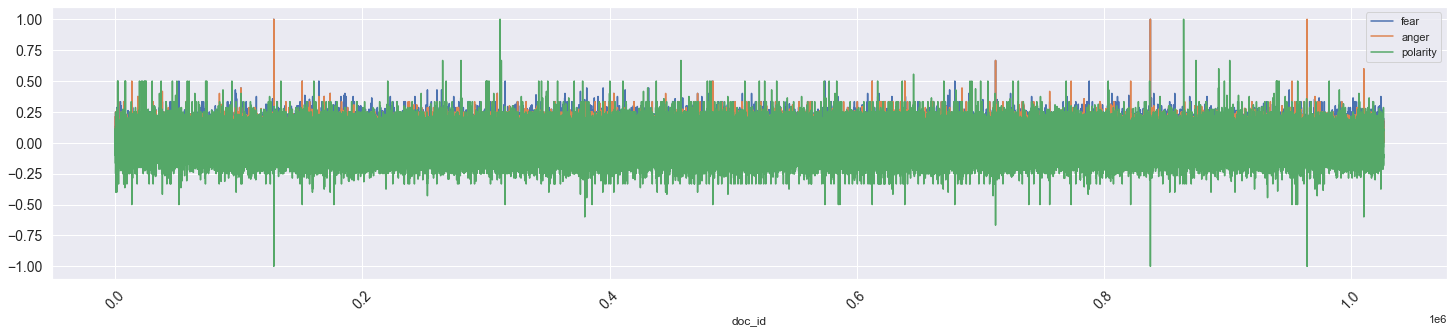

In [148]:
plot_sentiments(TOKENS_emo, ['fear','anger', 'polarity'])

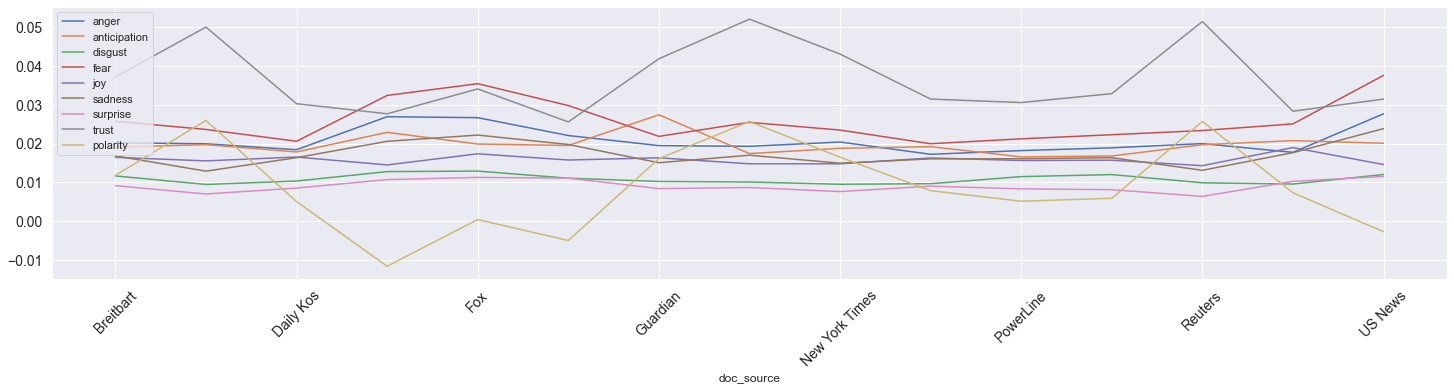

In [149]:
plot_sentiments(TOKENS_emo_doc_source, emo_cols)

In [150]:
TOKENS_emo_doc_source

anger  anticipation   disgust      fear       joy  \
doc_source                                                                  
Breitbart            0.020199      0.019080  0.011663  0.025732  0.016452   
CNN                  0.019937      0.019721  0.009473  0.023629  0.015543   
Daily Kos            0.018415      0.017836  0.010352  0.020583  0.016534   
Drudge Report        0.026913      0.022878  0.012779  0.032384  0.014497   
Fox                  0.026661      0.019878  0.012913  0.035410  0.017361   
Google News          0.022067      0.019506  0.011087  0.029777  0.015761   
Guardian             0.019471      0.027400  0.010246  0.021847  0.016335   
NPR                  0.019290      0.017416  0.010103  0.025459  0.014787   
New York Times       0.020394      0.018779  0.009524  0.023466  0.014790   
Politico Magazine    0.017234      0.019193  0.009670  0.019953  0.016292   
PowerLine            0.018187      0.016577  0.011491  0.021216  0.015638   
Real Clear Politics  0.018905      0.016795  0.012016  0.022271  0.015716   
Reuters              0.019985      0.019699  0.009900  0.023352  0.014303   
UPI Latest           0.017735      0.020756  0.009581  0.025056  0.018966   
US News              0.027660      0.020077  0.012043  0.037553  0.014598   

                      sadness  surprise     trust  polarity  
doc_source                                                   
Breitbart            0.016828  0.009165  0.037152  0.011816  
CNN                  0.012902  0.007017  0.049972  0.025946  
Daily Kos            0.016369  0.008543  0.030254  0.005073  
Drudge Report        0.020576  0.010716  0.027662 -0.011577  
Fox                  0.022183  0.011292  0.034053  0.000431  
Google News          0.019764  0.011101  0.025569 -0.004949  
Guardian             0.015064  0.008401  0.041821  0.016109  
NPR                  0.016999  0.008682  0.052016  0.025674  
New York Times       0.014943  0.007645  0.043037  0.016487  
Politico Magazine    0.016057  0.009031  0.031447  0.007874  
PowerLine            0.016094  0.008339  0.030553  0.005163  
Real Clear Politics  0.016355  0.008126  0.032847  0.005911  
Reuters              0.013118  0.006401  0.051403  0.025704  
UPI Latest           0.017658  0.010280  0.028322  0.007332  
US News              0.023845  0.011535  0.031439 -0.002697

In [151]:
TOKENS_emo_doc_source.var(axis = 0).sort_values(ascending=False)

polarity        0.000131
trust           0.000080
fear            0.000030
anger           0.000012
sadness         0.000010
anticipation    0.000007
surprise        0.000002
joy             0.000002
disgust         0.000001
dtype: float64

In [152]:
TOKENS_emo_doc_source.sort_values(by=['polarity','trust','fear'], ascending=False)[['polarity','trust','fear']]

polarity     trust      fear
doc_source                                       
CNN                  0.025946  0.049972  0.023629
Reuters              0.025704  0.051403  0.023352
NPR                  0.025674  0.052016  0.025459
New York Times       0.016487  0.043037  0.023466
Guardian             0.016109  0.041821  0.021847
Breitbart            0.011816  0.037152  0.025732
Politico Magazine    0.007874  0.031447  0.019953
UPI Latest           0.007332  0.028322  0.025056
Real Clear Politics  0.005911  0.032847  0.022271
PowerLine            0.005163  0.030553  0.021216
Daily Kos            0.005073  0.030254  0.020583
Fox                  0.000431  0.034053  0.035410
US News             -0.002697  0.031439  0.037553
Google News         -0.004949  0.025569  0.029777
Drudge Report       -0.011577  0.027662  0.032384

In [153]:
Fox['html'] =  Fox.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
CNN['html'] =  CNN.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
NYT['html'] =  NYT.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [154]:
Fox_sents = Fox.groupby(sent)[emo_cols].mean()
CNN_sents = CNN.groupby(sent)[emo_cols].mean()
NYT_sents = NYT.groupby(sent)[emo_cols].mean()

In [155]:
Fox_sents['sent_str'] = Fox.groupby(sent).term_str.apply(lambda x: x.str.cat(sep=' '))
Fox_sents['html_str'] = Fox.groupby(sent).html.apply(lambda x: x.str.cat(sep=' '))

In [156]:
CNN_sents['sent_str'] = CNN.groupby(sent).term_str.apply(lambda x: x.str.cat(sep=' '))
CNN_sents['html_str'] = CNN.groupby(sent).html.apply(lambda x: x.str.cat(sep=' '))

In [157]:
NYT_sents['sent_str'] = NYT.groupby(sent).term_str.apply(lambda x: x.str.cat(sep=' '))
NYT_sents['html_str'] = NYT.groupby(sent).html.apply(lambda x: x.str.cat(sep=' '))

In [158]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [159]:
sample_sentences(Fox_sents)

In [160]:
sample_sentences(CNN_sents)

In [161]:
sample_sentences(NYT_sents)

In [162]:
#Save TOKENS, note term_str column holds term_str to be compared to VOCAB
TOKENS.to_csv('TOKEN_emo.csv')
#Sentiment polarity and emotions for each document 
TOKENS_emo.to_csv("TOKEN_emo_doc_id.csv")